In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import mean
from numpy import absolute
from sklearn.model_selection import cross_val_score
import warnings
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib as mpl


In [2]:
datarating = pd.read_csv("bookrating.csv")
datarating.head()


,books_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [3]:
datarating.loc[datarating.rating == -1, 'rating'] = np.NaN
datarating.head()

,books_id,user_id,rating
0,1,314,5.0
1,1,439,3.0
2,1,588,5.0
3,1,1169,4.0
4,1,1185,4.0


In [4]:
databook=pd.read_csv('books.csv')
book_index = pd.Series(databook.index, index=databook.title)
databook.head()

,books_id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
data = pd.merge(datarating, databook, on='books_id', how='inner')
data.head()

,books_id,user_id,rating,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,314,5.0,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,1,439,3.0,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
2,1,588,5.0,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
3,1,1169,4.0,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
4,1,1185,4.0,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...


In [6]:
print('The ratings dataset has', datarating['user_id'].nunique(), 'unique users')
print('The ratings dataset has', datarating['books_id'].nunique(), 'unique books')
print('The ratings dataset has', datarating['rating'].nunique(), 'unique ratings')
print('The unique ratings are', sorted(datarating['rating'].unique()))

The ratings dataset has 6248 unique users
The ratings dataset has 1000 unique books
The ratings dataset has 5 unique ratings
The unique ratings are [1.0, 2.0, 3.0, 4.0, 5.0]


In [7]:
agg_ratings = data.groupby('title').agg(mean_rating = ('rating', 'mean'),number_of_ratings = ('rating', 'count')).reset_index()
# Buku dengan lebih dari 100 peringkat
agg_ratings_100 = agg_ratings[agg_ratings['number_of_ratings']==100]
agg_ratings_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              997 non-null    object 
 1   mean_rating        997 non-null    float64
 2   number_of_ratings  997 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.2+ KB


In [8]:
agg_ratings_100.sort_values(by='number_of_ratings', ascending=False).head()

,title,mean_rating,number_of_ratings
0,'Salem's Lot,3.85,100
672,The Five Love Languages: How to Express Heartf...,4.01,100
659,"The Dragon Reborn (Wheel of Time, #3)",3.96,100
660,"The Drawing of the Three (The Dark Tower, #2)",4.21,100
661,"The Edge of Never (The Edge of Never, #1)",3.72,100


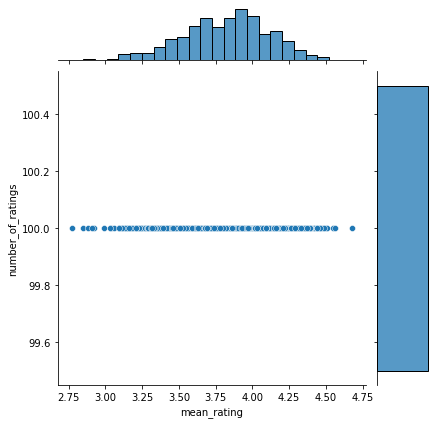

In [9]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_100)

In [10]:
dataset = pd.merge(data, agg_ratings_100[['title']], on='title', how='inner')

In [11]:
print('The ratings dataset has', dataset['user_id'].nunique(), 'unique users')
print('The ratings dataset has', dataset['book_id'].nunique(), 'unique books')
print('The ratings dataset has', dataset['rating'].nunique(), 'unique ratings')
print('The unique ratings are', sorted(dataset['rating'].unique()))

The ratings dataset has 6188 unique users
The ratings dataset has 997 unique books
The ratings dataset has 5 unique ratings
The unique ratings are [1.0, 2.0, 3.0, 4.0, 5.0]


In [12]:
pivot = pd.pivot_table(dataset, index='title', columns = 'user_id', values = 'rating', aggfunc = np.sum )
pivot.head()

user_id,7,35,41,75,143,146,153,158,173,178,...,53292,53293,53318,53332,53352,53354,53356,53366,53381,53403
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/22/1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1Q84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='# of ratings', ylabel='Density'>

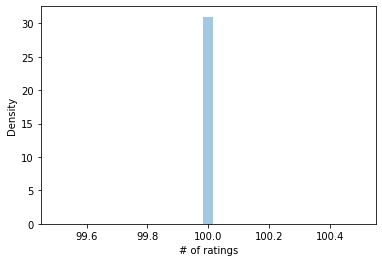

In [13]:
ratings_data = pd.DataFrame(dataset.groupby('title')['rating'].mean())
ratings_data['# of ratings'] = dataset.groupby('title')['rating'].count()
sns.distplot(ratings_data['# of ratings'])

c:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

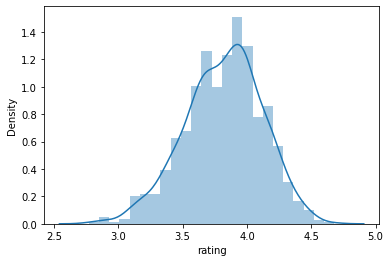

In [14]:
sns.distplot(ratings_data['rating'])

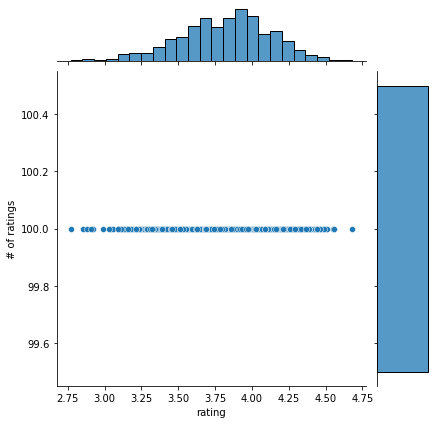

In [15]:
sns.jointplot(x = ratings_data['rating'], y = ratings_data['# of ratings'])

In [16]:
pivot.dropna(axis=1, how='all', inplace=True)
pivot.head()

user_id,7,35,41,75,143,146,153,158,173,178,...,53292,53293,53318,53332,53352,53354,53356,53366,53381,53403
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/22/1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1Q84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
pivot.fillna(0, inplace=True)
pivot.head()

user_id,7,35,41,75,143,146,153,158,173,178,...,53292,53293,53318,53332,53352,53354,53356,53366,53381,53403
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11/22/1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1Q84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cosine Similarity

In [18]:
item_cos_sim = pd.DataFrame(cosine_similarity(pivot, pivot), index=pivot.index, columns=pivot.index)
item_cos_sim.head()

title,'Salem's Lot,11/22/1963,1776,1984,1Q84,"1st to Die (Women's Murder Club, #1)","2001: A Space Odyssey (Space Odyssey, #1)",A Beautiful Mind,A Bend in the Road,A Brief History of Time,...,Wonder,"Wool Omnibus (Silo, #1)","Words of Radiance (The Stormlight Archive, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,Yes Please,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,1.000000,0.208345,0.031028,0.143802,0.008694,0.076994,0.179496,0.000000,0.041169,0.075408,...,0.019354,0.036814,0.023056,0.156869,0.096546,0.106232,0.054123,0.037970,0.034435,0.095702
11/22/1963,0.208345,1.000000,0.066474,0.104806,0.098811,0.062663,0.067244,0.000000,0.022552,0.070794,...,0.038897,0.101418,0.022710,0.198288,0.146303,0.094010,0.032303,0.105186,0.036787,0.100116
1776,0.031028,0.066474,1.000000,0.021407,0.021489,0.047649,0.074013,0.020258,0.012229,0.074035,...,0.028266,0.009559,0.017460,0.047574,0.027117,0.081886,0.031490,0.076364,0.031556,0.084060
1984,0.143802,0.104806,0.021407,1.000000,0.012471,0.043193,0.078018,0.000000,0.000000,0.137682,...,0.021759,0.000000,0.019107,0.135465,0.100977,0.429189,0.035076,0.034820,0.028328,0.112313
1Q84,0.008694,0.098811,0.021489,0.012471,1.000000,0.006847,0.042227,0.000000,0.000000,0.017803,...,0.040616,0.100436,0.019354,0.067461,0.077279,0.003981,0.078954,0.067927,0.093522,0.047753


In [19]:
#Cosine Similarity
def get_similar_book(title):
    if title not in pivot.index:
        return None, None
    else:
        sim_books = item_cos_sim.sort_values(by=title, ascending=False).index[1:]
        sim_score = item_cos_sim.sort_values(by=title, ascending=False).loc[:, title].tolist()[1:]
        return sim_books, sim_score

In [20]:
#buku = input()
books, scores = get_similar_book('1984')
print("\n",'1984',":")
for x,y in zip(books[:10], scores[:10]):
    print("{}, with Cosine Similarity : {}".format(x, y))


 1984 :
Animal Farm, with Cosine Similarity : 0.703917180481405
Pride and Prejudice, with Cosine Similarity : 0.6346678183909347
Fahrenheit 451, with Cosine Similarity : 0.63113469123812
Jane Eyre, with Cosine Similarity : 0.6162158506256372
Harry Potter and the Sorcerer's Stone (Harry Potter, #1), with Cosine Similarity : 0.5902385227283753
The Girl with the Dragon Tattoo (Millennium, #1), with Cosine Similarity : 0.5851413664845332
The Catcher in the Rye, with Cosine Similarity : 0.5741682154236565
The Fellowship of the Ring (The Lord of the Rings, #1), with Cosine Similarity : 0.563780043257437
To Kill a Mockingbird, with Cosine Similarity : 0.5603539880374007
The Great Gatsby, with Cosine Similarity : 0.5590274446696226


In [21]:
buku = pivot.index
for i in range (50):
    list_a = buku[i]
    list_b = list_a
    books, scores = get_similar_book(list_a)
    print("\n",list_a,":")
    for x,y in zip(books[:10], scores[:100]):
        print("{} with Cosine Similarity : {}".format(x, y))


 'Salem's Lot :
Pet Sematary with Cosine Similarity : 0.6257057548394012
Needful Things with Cosine Similarity : 0.5513219341287796
The Dead Zone with Cosine Similarity : 0.549047921257838
Misery with Cosine Similarity : 0.5379111266105823
Cujo with Cosine Similarity : 0.5291363436440579
The Green Mile with Cosine Similarity : 0.5053120199871588
Carrie with Cosine Similarity : 0.4933016012750583
Christine with Cosine Similarity : 0.48124453120074895
The Gunslinger (The Dark Tower, #1) with Cosine Similarity : 0.46574264566548856
It with Cosine Similarity : 0.4245046013243884

 11/22/1963 :
Under the Dome with Cosine Similarity : 0.3008878642143779
The Night Circus with Cosine Similarity : 0.24563273396187751
Bag of Bones with Cosine Similarity : 0.23874701466474146
The Girl Who Loved Tom Gordon with Cosine Similarity : 0.23812895099367765
The Gunslinger (The Dark Tower, #1) with Cosine Similarity : 0.23131756563206834
Wizard and Glass (The Dark Tower, #4) with Cosine Similarity : 0.22

Euclidean Distance

In [22]:
item_euclidean = pd.DataFrame(euclidean_distances(pivot, pivot), index=pivot.index, columns=pivot.index)
item_euclidean.head()

title,'Salem's Lot,11/22/1963,1776,1984,1Q84,"1st to Die (Women's Murder Club, #1)","2001: A Space Odyssey (Space Odyssey, #1)",A Beautiful Mind,A Bend in the Road,A Brief History of Time,...,Wonder,"Wool Omnibus (Silo, #1)","Words of Radiance (The Stormlight Archive, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,Yes Please,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.000000,51.971146,55.892754,53.758720,54.479354,53.197744,50.685304,57.192657,52.535702,54.249424,...,58.889727,56.053546,62.506000,51.215232,54.046276,53.169540,53.553711,55.605755,53.525695,52.019227
11/22/1963,51.971146,0.000000,57.122675,57.122675,54.267854,55.937465,56.338264,59.514704,55.488738,56.656862,...,60.489669,56.347138,64.591021,52.096065,54.699177,55.785303,56.542020,55.848008,55.856960,54.212545
1776,55.892754,57.122675,0.000000,58.189346,54.899909,54.790510,54.580216,57.349804,54.110997,55.018179,...,59.329588,57.584720,63.348244,55.181519,56.824291,54.616847,54.954527,55.208695,54.378304,53.103672
1984,53.758720,57.122675,58.189346,0.000000,56.480085,56.213877,55.722527,59.219929,55.803226,54.304696,...,60.745370,59.143892,64.443774,53.805204,55.848008,44.079474,56.160484,57.706152,55.794265,53.553711
1Q84,54.479354,54.267854,54.899909,56.480085,0.000000,53.870214,53.488316,55.919585,52.287666,54.635154,...,57.061370,52.971691,61.489837,52.602281,53.394756,54.836119,51.575188,53.497664,50.586559,52.076866


In [23]:
min_max = pd.DataFrame(euclidean_distances(pivot, pivot), index=pivot.index, columns=pivot.index) 
for columns in min_max.columns:
    min_max[columns] = min_max[columns] / min_max.values.max()
min_max.head()

title,'Salem's Lot,11/22/1963,1776,1984,1Q84,"1st to Die (Women's Murder Club, #1)","2001: A Space Odyssey (Space Odyssey, #1)",A Beautiful Mind,A Bend in the Road,A Brief History of Time,...,Wonder,"Wool Omnibus (Silo, #1)","Words of Radiance (The Stormlight Archive, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,Yes Please,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.000000,0.774396,0.832830,0.801032,0.811770,0.792673,0.755236,0.852199,0.782808,0.808343,...,0.877486,0.835226,0.931371,0.805466,0.849990,0.836202,0.842244,0.874516,0.865912,0.841541
11/22/1963,0.774396,0.000000,0.851156,0.851156,0.808618,0.833496,0.839468,0.886799,0.826810,0.844216,...,0.901326,0.839600,0.962438,0.819319,0.860258,0.877340,0.889241,0.878326,0.903626,0.877024
1776,0.832830,0.851156,0.000000,0.867050,0.818036,0.816406,0.813272,0.854541,0.806281,0.819798,...,0.884040,0.858041,0.943920,0.867844,0.893680,0.858964,0.864274,0.868272,0.879705,0.859085
1984,0.801032,0.851156,0.867050,0.000000,0.841581,0.837615,0.830293,0.882406,0.831496,0.809167,...,0.905136,0.881274,0.960244,0.846199,0.878326,0.693241,0.883240,0.907549,0.902612,0.866365
1Q84,0.811770,0.808618,0.818036,0.841581,0.000000,0.802693,0.797003,0.833230,0.779112,0.814091,...,0.850243,0.789305,0.916229,0.827280,0.839744,0.862412,0.811127,0.841362,0.818364,0.842474


In [24]:
nilai_euclidean = min_max
for columns in nilai_euclidean.columns:
    nilai_euclidean[columns] = 1/(1 + nilai_euclidean[columns])
nilai_euclidean.head()

title,'Salem's Lot,11/22/1963,1776,1984,1Q84,"1st to Die (Women's Murder Club, #1)","2001: A Space Odyssey (Space Odyssey, #1)",A Beautiful Mind,A Bend in the Road,A Brief History of Time,...,Wonder,"Wool Omnibus (Silo, #1)","Words of Radiance (The Stormlight Archive, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,Yes Please,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,1.000000,0.563572,0.545604,0.555237,0.551947,0.557826,0.569724,0.539899,0.560913,0.552992,...,0.532627,0.544892,0.517767,0.553874,0.540543,0.544602,0.542816,0.533471,0.535931,0.543023
11/22/1963,0.563572,1.000000,0.540203,0.540203,0.552908,0.545406,0.543635,0.529998,0.547402,0.542236,...,0.525949,0.543596,0.509570,0.549656,0.537560,0.532669,0.529313,0.532389,0.525313,0.532758
1776,0.545604,0.540203,1.000000,0.535604,0.550044,0.550538,0.551489,0.539217,0.553624,0.549511,...,0.530774,0.538201,0.514424,0.535377,0.528072,0.537934,0.536402,0.535254,0.531998,0.537899
1984,0.555237,0.540203,0.535604,1.000000,0.543012,0.544184,0.546360,0.531235,0.546002,0.552741,...,0.524897,0.531555,0.510140,0.541653,0.532389,0.590583,0.531000,0.524233,0.525593,0.535801
1Q84,0.551947,0.552908,0.550044,0.543012,1.000000,0.554726,0.556482,0.545485,0.562078,0.551240,...,0.540470,0.558876,0.521858,0.547261,0.543554,0.536938,0.552142,0.543076,0.549945,0.542749


In [25]:
#Euclidean Distance
def get_euclidean_book(title):
    if title not in pivot.index:
        return None, None
    else:
        eucl_books = nilai_euclidean.sort_values(by=title, ascending=False).index[1:]
        eucl_score = nilai_euclidean.sort_values(by=title, ascending=False).loc[:, title].tolist()[1:]
        return eucl_books, eucl_score

In [26]:
#buku_eu = input()
books, scores = get_euclidean_book('1984')
print("\n",'1984',":")
for x,y in zip(books[:10], scores[:10]):
    print("{}, with Euclidean Distance : {}".format(x, y))


 1984 :
Animal Farm, with Euclidean Distance : 0.6785274934202931
Pride and Prejudice, with Euclidean Distance : 0.6478307695407368
Fahrenheit 451, with Euclidean Distance : 0.6468913213537411
Jane Eyre, with Euclidean Distance : 0.6451999417954354
The Catcher in the Rye, with Euclidean Distance : 0.6380016387890586
The Girl with the Dragon Tattoo (Millennium, #1), with Euclidean Distance : 0.6376040302014228
Harry Potter and the Sorcerer's Stone (Harry Potter, #1), with Euclidean Distance : 0.6333064911976591
The Great Gatsby, with Euclidean Distance : 0.6328459009648985
Memoirs of a Geisha, with Euclidean Distance : 0.6316253460352119
Lord of the Flies, with Euclidean Distance : 0.630868107727215


In [27]:
buku = pivot.index
for i in range (50):
    list_a = buku[i]
    list_b = list_a
    books, scores = get_euclidean_book(list_a)
    print("\n",list_a,":")
    for x,y in zip(books[:10], scores[:100]):
        print("{} with Cosine Similarity : {}".format(x, y))


 'Salem's Lot :
Pet Sematary with Cosine Similarity : 0.6675577373036442
Cujo with Cosine Similarity : 0.6515677627905656
Needful Things with Cosine Similarity : 0.6457894972876914
The Dead Zone with Cosine Similarity : 0.6450319730523958
Christine with Cosine Similarity : 0.6371284523887992
Misery with Cosine Similarity : 0.6363395552521958
Carrie with Cosine Similarity : 0.6302653837800397
Thinner with Cosine Similarity : 0.6195086038055566
The Green Mile with Cosine Similarity : 0.6193006567979734
Firestarter with Cosine Similarity : 0.6182657403548038

 11/22/1963 :
Cujo with Cosine Similarity : 0.5808686364127617
Under the Dome with Cosine Similarity : 0.5798344750849405
Gerald's Game with Cosine Similarity : 0.5790129235058593
The Girl Who Loved Tom Gordon with Cosine Similarity : 0.577688686230253
Christine with Cosine Similarity : 0.5766287053992587
The Lost Symbol (Robert Langdon, #3) with Cosine Similarity : 0.5758767461237058
Insomnia with Cosine Similarity : 0.575377806515

Prediksi Rating

In [28]:
#cosine similarity
def predict_rating(user_id, book_name, max_neighbor=10):
    books, scores = get_similar_book(book_name)
    book_arr = np.array([x for x in books])
    sim_arr = np.array([x for x in scores])
    
    filtering = pivot[user_id].loc[book_arr] != 0
    
    s = np.dot(sim_arr[filtering][:max_neighbor], pivot[user_id].loc[book_arr[filtering][:max_neighbor]]) \
            / np.sum(sim_arr[filtering][:max_neighbor])
    
    return s

In [29]:
print("Prediksi Rating :")
print("U1 B3 :",predict_rating(3922, "Harry Potter and the Chamber of Secrets (Harry Potter, #2)"))

Prediksi Rating :
U1 B3 : 4.8450204159953705


In [30]:
#euclidean distance
def predict_euclidean_rating(user_id, book_name, max_neighbor=10):
    books, scores = get_euclidean_book(book_name)
    book_arr = np.array([x for x in books])
    sim_arr = np.array([x for x in scores])
    
    filtering = pivot[user_id].loc[book_arr] != 0
    
    s = np.dot(sim_arr[filtering][:max_neighbor], pivot[user_id].loc[book_arr[filtering][:max_neighbor]]) \
            / np.sum(sim_arr[filtering][:max_neighbor])
    
    return s

In [31]:
print("Prediksi Rating :")
print("U1 B3 :",predict_euclidean_rating(3922, "Harry Potter and the Chamber of Secrets (Harry Potter, #2)"))

Prediksi Rating :
U1 B3 : 4.811237290910761


Prediksi Rating Kosong (Prediksi buku yang belum diberi rating)

In [32]:
#Prediksi Rating Kosong (Prediksi buku yang belum diberi rating)
zero_rating = pivot.reset_index().melt(id_vars = ['title'])
unseen = zero_rating.loc[zero_rating['value'] == 0]
cnt = unseen.title.count()

note = pd.DataFrame(unseen['user_id'])
note = note.set_index(['user_id'])
userc = note.index

unseen_book = pd.DataFrame(unseen['title'])
unseen_book = unseen_book.set_index(['title'])
bookc = unseen_book.index

for i in range (0,10):
    print(userc[i], bookc[i],": \n",predict_rating(userc[i],bookc[i]))

7 'Salem's Lot : 
 4.322154201751105
7 11/22/1963 : 
 4.387885910390671
7 1776 : 
 4.246855667198202
7 1984 : 
 4.155260014090634
7 1Q84 : 
 4.293712516702544
7 1st to Die (Women's Murder Club, #1) : 
 4.0
7 2001: A Space Odyssey (Space Odyssey, #1) : 
 4.252214876745611
7 A Beautiful Mind : 
 5.0
7 A Bend in the Road : 
 4.0
7 A Brief History of Time : 
 4.413621627882271


In [33]:
#Prediksi Rating Kosong (Prediksi buku yang belum diberi rating)
zero_rating = pivot.reset_index().melt(id_vars = ['title'])
unseen = zero_rating.loc[zero_rating['value'] == 0]
cnt = unseen.title.count()

note = pd.DataFrame(unseen['user_id'])
note = note.set_index(['user_id'])
userc = note.index

unseen_book = pd.DataFrame(unseen['title'])
unseen_book = unseen_book.set_index(['title'])
bookc = unseen_book.index

for i in range (0,10):
    print(userc[i], bookc[i],": \n",predict_euclidean_rating(userc[i],bookc[i]))

7 'Salem's Lot : 
 4.331318148701717
7 11/22/1963 : 
 4.331586051896615
7 1776 : 
 4.331080952828386
7 1984 : 
 4.329841092053208
7 1Q84 : 
 4.331111402579938
7 1st to Die (Women's Murder Club, #1) : 
 4.330698268905605
7 2001: A Space Odyssey (Space Odyssey, #1) : 
 4.330497625850511
7 A Beautiful Mind : 
 4.3334391060318485
7 A Bend in the Road : 
 4.3308365209860655
7 A Brief History of Time : 
 4.332896823630763


Prediksi Semua Rating

In [34]:
value = pivot.reset_index().melt(id_vars = ['title'])
seen = zero_rating.loc[zero_rating['value'] >= 1]
seen

,title,user_id,value
187,"Death Note, Vol. 1: Boredom (Death Note, #1)",7,4.0
460,"Old Man's War (Old Man's War, #1)",7,4.0
572,"Surely You're Joking, Mr. Feynman!: Adventures...",7,5.0
1011,A Confederacy of Dunces,35,2.0
1014,"A Discovery of Witches (All Souls Trilogy, #1)",35,2.0
...,...,...,...
6168018,Team of Rivals: The Political Genius of Abraha...,53381,5.0
6168164,The Hunger Games: Official Illustrated Movie C...,53381,5.0
6168656,Eleven Minutes,53403,2.0
6168892,Not That Kind of Girl: A Young Woman Tells You...,53403,3.0


In [35]:
#prediksi semua rating (Cosine Similarity)
print("Prediksi Semua Rating  :")
userx = dataset["user_id"]
bookx = pivot.index

for i in range (0,9):
   for j in range(0,9):
        print(userx[i], bookx[j],": \n",predict_rating(userx[i], bookx[j]))

Prediksi Semua Rating  :
314 'Salem's Lot : 
 3.709646812041864
314 11/22/1963 : 
 3.7108874219986325
314 1776 : 
 3.6138561276274768
314 1984 : 
 3.7936352476383264
314 1Q84 : 
 4.041812333733606
314 1st to Die (Women's Murder Club, #1) : 
 2.7978551280196386
314 2001: A Space Odyssey (Space Odyssey, #1) : 
 3.6601148660546334
314 A Beautiful Mind : 
 3.9569221187060224
314 A Bend in the Road : 
 3.315307003628229
439 'Salem's Lot : 
 2.921726206260111
439 11/22/1963 : 
 3.373924318794473
439 1776 : 
 2.897603239272106
439 1984 : 
 3.3382416838339477
439 1Q84 : 
 3.66703004520427
439 1st to Die (Women's Murder Club, #1) : 
 2.8234858653641925
439 2001: A Space Odyssey (Space Odyssey, #1) : 
 3.0086233290264928
439 A Beautiful Mind : 
 3.505720830832017
439 A Bend in the Road : 
 2.9866364596361117
588 'Salem's Lot : 
 3.617129849437872
588 11/22/1963 : 
 3.8068089091560955
588 1776 : 
 3.6362937549021463
588 1984 : 
 3.224416803804413
588 1Q84 : 
 3.5331347325611877
588 1st to Die (Wo

In [36]:
#prediksi semua rating (Euclidean Distance)
print("Prediksi Semua Rating  :")
userx = dataset["user_id"]
bookx = pivot.index

for i in range (0,9):
   for j in range(0,9):
        print(userx[i], bookx[j],": \n",predict_euclidean_rating(userx[i], bookx[j]))

Prediksi Semua Rating  :
314 'Salem's Lot : 
 2.601429125280104
314 11/22/1963 : 
 2.6987803211454424
314 1776 : 
 2.3996618477835394
314 1984 : 
 3.6007602426336938
314 1Q84 : 
 2.4991609635295355
314 1st to Die (Women's Murder Club, #1) : 
 2.39889839567929
314 2001: A Space Odyssey (Space Odyssey, #1) : 
 3.2001479877603436
314 A Beautiful Mind : 
 2.400247860723824
314 A Bend in the Road : 
 2.4988876236834643
439 'Salem's Lot : 
 2.401530364862815
439 11/22/1963 : 
 2.698631352564603
439 1776 : 
 2.699492473022914
439 1984 : 
 3.2033453476501266
439 1Q84 : 
 3.006788405466318
439 1st to Die (Women's Murder Club, #1) : 
 2.6013313849770863
439 2001: A Space Odyssey (Space Odyssey, #1) : 
 2.799736683629354
439 A Beautiful Mind : 
 2.7991304429302137
439 A Bend in the Road : 
 2.705680790359167
588 'Salem's Lot : 
 2.4960182354430076
588 11/22/1963 : 
 2.6975159084015385
588 1776 : 
 2.4983570374437405
588 1984 : 
 3.0996951143682456
588 1Q84 : 
 2.39953047340096
588 1st to Die (Wom

Rekomendasi Buku untuk User

In [37]:

def get_recommendation(user_id, n_book=100):
    predicted_rating = np.array([])
    
    for _book in pivot.index:
        predicted_rating = np.append(predicted_rating, predict_rating(user_id, _book))
    
    temp = pd.DataFrame({'predicted':predicted_rating, 'name':pivot.index})
    filtering = (pivot[user_id] == 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)

    return databook.loc[book_index.loc[temp.name[:n_book]]]



In [38]:
#Cosine Similarity
user_id = int(input("Enter Your User Id: "))
print("\n Recommended Book for User",user_id)
buku_ = get_recommendation(user_id)
related_predict = pd.DataFrame(buku_)
related_rating = related_predict.set_index(['title'])
lists = pd.DataFrame(buku_[['book_id','isbn','title','authors','average_rating']])
for i in range (0,4):
    print("\n Prediksi: ",predict_rating(user_id,related_rating.index[i]))
lists



 Recommended Book for User 3922

 Prediksi:  4.912632043830423

 Prediksi:  4.910005165732665

 Prediksi:  4.906835094070647

 Prediksi:  4.890496941880357


,book_id,isbn,title,authors,average_rating
547,162085,60887303,"Pretty Little Liars (Pretty Little Liars, #1)",Sara Shepard,3.90
710,764347,1416912045,"Unwind (Unwind, #1)",Neal Shusterman,4.18
720,17571564,1451666179,"Hyperbole and a Half: Unfortunate Situations, ...",Allie Brosh,4.17
518,24768,689865392,"Pretties (Uglies, #2)",Scott Westerfeld,3.85
580,13206760,312642962,"Scarlet (The Lunar Chronicles, #2)",Marissa Meyer,4.30
...,...,...,...,...,...
565,25041504,NaN,"After You (Me Before You, #2)",Jojo Moyes,3.70
701,13486632,1843913720,The Hundred-Year-Old Man Who Climbed Out of th...,"Jonas Jonasson, Rod Bradbury",3.81
660,46677,689711735,"Alexander and the Terrible, Horrible, No Good,...","Judith Viorst, Ray Cruz",4.22
278,29056083,751565350,Harry Potter and the Cursed Child - Parts One ...,"John Tiffany, Jack Thorne, J.K. Rowling",3.75


In [39]:
# Euclidean Distance
user_id = int(input("Enter Your User Id: "))
print("\n Recommended Book for User",user_id)
buku_ = get_recommendation(user_id)
related_predict = pd.DataFrame(buku_)
related_rating = related_predict.set_index(['title'])
lists = pd.DataFrame(buku_[['book_id','isbn','title','authors','average_rating']])
for i in range (0,4):
    print("\n Prediksi: ",predict_euclidean_rating(user_id,related_rating.index[i]))
lists



 Recommended Book for User 3922

 Prediksi:  3.3992570634496877

 Prediksi:  3.3993147898597953

 Prediksi:  3.9969264511091933

 Prediksi:  3.399039628359636


,book_id,isbn,title,authors,average_rating
547,162085,60887303,"Pretty Little Liars (Pretty Little Liars, #1)",Sara Shepard,3.90
710,764347,1416912045,"Unwind (Unwind, #1)",Neal Shusterman,4.18
720,17571564,1451666179,"Hyperbole and a Half: Unfortunate Situations, ...",Allie Brosh,4.17
518,24768,689865392,"Pretties (Uglies, #2)",Scott Westerfeld,3.85
580,13206760,312642962,"Scarlet (The Lunar Chronicles, #2)",Marissa Meyer,4.30
...,...,...,...,...,...
565,25041504,NaN,"After You (Me Before You, #2)",Jojo Moyes,3.70
701,13486632,1843913720,The Hundred-Year-Old Man Who Climbed Out of th...,"Jonas Jonasson, Rod Bradbury",3.81
660,46677,689711735,"Alexander and the Terrible, Horrible, No Good,...","Judith Viorst, Ray Cruz",4.22
278,29056083,751565350,Harry Potter and the Cursed Child - Parts One ...,"John Tiffany, Jack Thorne, J.K. Rowling",3.75


Testing: MAE (Mean Absolute Error)

In [40]:
pred_euclidean = [
predict_euclidean_rating(3922, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(5115, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(5461, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(6342, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(7001, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(10111, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(10140, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(10944, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(11691, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(11692, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),

predict_euclidean_rating(3922, "To Kill a Mockingbird"),
predict_euclidean_rating(5115, "To Kill a Mockingbird"),
predict_euclidean_rating(5461, "To Kill a Mockingbird"),
predict_euclidean_rating(6342, "To Kill a Mockingbird"),
predict_euclidean_rating(7001, "To Kill a Mockingbird"),
predict_euclidean_rating(10111, "To Kill a Mockingbird"),
predict_euclidean_rating(10140, "To Kill a Mockingbird"),
predict_euclidean_rating(10944, "To Kill a Mockingbird"),
predict_euclidean_rating(11691, "To Kill a Mockingbird"),
predict_euclidean_rating(11692, "To Kill a Mockingbird"),

predict_euclidean_rating(3922, "The Great Gatsby"),
predict_euclidean_rating(5115, "The Great Gatsby"),
predict_euclidean_rating(5461, "The Great Gatsby"),
predict_euclidean_rating(6342, "The Great Gatsby"),
predict_euclidean_rating(7001, "The Great Gatsby"),
predict_euclidean_rating(10111, "The Great Gatsby"),
predict_euclidean_rating(10140, "The Great Gatsby"),
predict_euclidean_rating(10944, "The Great Gatsby"),
predict_euclidean_rating(11691, "The Great Gatsby"),
predict_euclidean_rating(11692, "The Great Gatsby"),

predict_euclidean_rating(3922, "Pride and Prejudice"),
predict_euclidean_rating(5115, "Pride and Prejudice"),
predict_euclidean_rating(5461, "Pride and Prejudice"),
predict_euclidean_rating(6342, "Pride and Prejudice"),
predict_euclidean_rating(7001, "Pride and Prejudice"),
predict_euclidean_rating(10111, "Pride and Prejudice"),
predict_euclidean_rating(10140, "Pride and Prejudice"),
predict_euclidean_rating(10944, "Pride and Prejudice"),
predict_euclidean_rating(11691, "Pride and Prejudice"),
predict_euclidean_rating(11692, "Pride and Prejudice"),

predict_euclidean_rating(3922, "The Kite Runner"),
predict_euclidean_rating(5115, "The Kite Runner"),
predict_euclidean_rating(5461, "The Kite Runner"),
predict_euclidean_rating(6342, "The Kite Runner"),
predict_euclidean_rating(7001, "The Kite Runner"),
predict_euclidean_rating(10111, "The Kite Runner"),
predict_euclidean_rating(10140, "The Kite Runner"),
predict_euclidean_rating(10944, "The Kite Runner"),
predict_euclidean_rating(11691, "The Kite Runner"),
predict_euclidean_rating(11692, "The Kite Runner"),

predict_euclidean_rating(3922, "1984"),
predict_euclidean_rating(5115, "1984"),
predict_euclidean_rating(5461, "1984"),
predict_euclidean_rating(6342, "1984"),
predict_euclidean_rating(7001, "1984"),
predict_euclidean_rating(10111, "1984"),
predict_euclidean_rating(10140, "1984"),
predict_euclidean_rating(10944, "1984"),
predict_euclidean_rating(11691, "1984"),
predict_euclidean_rating(11692, "1984"),

predict_euclidean_rating(3922, "Animal Farm"),
predict_euclidean_rating(5115, "Animal Farm"),
predict_euclidean_rating(5461, "Animal Farm"),
predict_euclidean_rating(6342, "Animal Farm"),
predict_euclidean_rating(7001, "Animal Farm"),
predict_euclidean_rating(10111, "Animal Farm"),
predict_euclidean_rating(10140, "Animal Farm"),
predict_euclidean_rating(10944, "Animal Farm"),
predict_euclidean_rating(11691, "Animal Farm"),
predict_euclidean_rating(11692, "Animal Farm"),

predict_euclidean_rating(3922, "The Diary of a Young Girl"),
predict_euclidean_rating(5115, "The Diary of a Young Girl"),
predict_euclidean_rating(5461, "The Diary of a Young Girl"),
predict_euclidean_rating(6342, "The Diary of a Young Girl"),
predict_euclidean_rating(7001, "The Diary of a Young Girl"),
predict_euclidean_rating(10111, "The Diary of a Young Girl"),
predict_euclidean_rating(10140, "The Diary of a Young Girl"),
predict_euclidean_rating(10944, "The Diary of a Young Girl"),
predict_euclidean_rating(11691, "The Diary of a Young Girl"),
predict_euclidean_rating(11692, "The Diary of a Young Girl"),

predict_euclidean_rating(3922, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(5115, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(5461, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(6342, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(7001, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(10111, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(10140, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(10944, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(11691, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(11692, "The Girl with the Dragon Tattoo (Millennium, #1)"),

predict_euclidean_rating(3922, "Memoirs of a Geisha"),
predict_euclidean_rating(5115, "Memoirs of a Geisha"),
predict_euclidean_rating(5461, "Memoirs of a Geisha"),
predict_euclidean_rating(6342, "Memoirs of a Geisha"),
predict_euclidean_rating(7001, "Memoirs of a Geisha"),
predict_euclidean_rating(10111, "Memoirs of a Geisha"),
predict_euclidean_rating(10140, "Memoirs of a Geisha"),
predict_euclidean_rating(10944, "Memoirs of a Geisha"),
predict_euclidean_rating(11691, "Memoirs of a Geisha"),
predict_euclidean_rating(11692, "Memoirs of a Geisha"),

]


In [41]:
pred_euclidean2 = [
predict_euclidean_rating(11927, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(11945, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(12874, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(12946, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(13282, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(14546, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(17984, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(18031, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(18313, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(18361, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),

predict_euclidean_rating(11927, "To Kill a Mockingbird"),
predict_euclidean_rating(11945, "To Kill a Mockingbird"),
predict_euclidean_rating(12874, "To Kill a Mockingbird"),
predict_euclidean_rating(12946, "To Kill a Mockingbird"),
predict_euclidean_rating(13282, "To Kill a Mockingbird"),
predict_euclidean_rating(14546, "To Kill a Mockingbird"),
predict_euclidean_rating(17984, "To Kill a Mockingbird"),
predict_euclidean_rating(18031, "To Kill a Mockingbird"),
predict_euclidean_rating(18313, "To Kill a Mockingbird"),
predict_euclidean_rating(18361, "To Kill a Mockingbird"),

predict_euclidean_rating(11927, "The Great Gatsby"),
predict_euclidean_rating(11945, "The Great Gatsby"),
predict_euclidean_rating(12874, "The Great Gatsby"),
predict_euclidean_rating(12946, "The Great Gatsby"),
predict_euclidean_rating(13282, "The Great Gatsby"),
predict_euclidean_rating(14546, "The Great Gatsby"),
predict_euclidean_rating(17984, "The Great Gatsby"),
predict_euclidean_rating(18031, "The Great Gatsby"),
predict_euclidean_rating(18313, "The Great Gatsby"),
predict_euclidean_rating(18361, "The Great Gatsby"),

predict_euclidean_rating(11927, "Pride and Prejudice"),
predict_euclidean_rating(11945, "Pride and Prejudice"),
predict_euclidean_rating(12874, "Pride and Prejudice"),
predict_euclidean_rating(12946, "Pride and Prejudice"),
predict_euclidean_rating(13282, "Pride and Prejudice"),
predict_euclidean_rating(14546, "Pride and Prejudice"),
predict_euclidean_rating(17984, "Pride and Prejudice"),
predict_euclidean_rating(18031, "Pride and Prejudice"),
predict_euclidean_rating(18313, "Pride and Prejudice"),
predict_euclidean_rating(18361, "Pride and Prejudice"),

predict_euclidean_rating(11927, "The Kite Runner"),
predict_euclidean_rating(11945, "The Kite Runner"),
predict_euclidean_rating(12874, "The Kite Runner"),
predict_euclidean_rating(12946, "The Kite Runner"),
predict_euclidean_rating(13282, "The Kite Runner"),
predict_euclidean_rating(14546, "The Kite Runner"),
predict_euclidean_rating(17984, "The Kite Runner"),
predict_euclidean_rating(18031, "The Kite Runner"),
predict_euclidean_rating(18313, "The Kite Runner"),
predict_euclidean_rating(18361, "The Kite Runner"),

predict_euclidean_rating(11927, "1984"),
predict_euclidean_rating(11945, "1984"),
predict_euclidean_rating(12874, "1984"),
predict_euclidean_rating(12946, "1984"),
predict_euclidean_rating(13282, "1984"),
predict_euclidean_rating(14546, "1984"),
predict_euclidean_rating(17984, "1984"),
predict_euclidean_rating(18031, "1984"),
predict_euclidean_rating(18313, "1984"),
predict_euclidean_rating(18361, "1984"),

predict_euclidean_rating(11927, "Animal Farm"),
predict_euclidean_rating(11945, "Animal Farm"),
predict_euclidean_rating(12874, "Animal Farm"),
predict_euclidean_rating(12946, "Animal Farm"),
predict_euclidean_rating(13282, "Animal Farm"),
predict_euclidean_rating(14546, "Animal Farm"),
predict_euclidean_rating(17984, "Animal Farm"),
predict_euclidean_rating(18031, "Animal Farm"),
predict_euclidean_rating(18313, "Animal Farm"),
predict_euclidean_rating(18361, "Animal Farm"),

predict_euclidean_rating(11927, "The Diary of a Young Girl"),
predict_euclidean_rating(11945, "The Diary of a Young Girl"),
predict_euclidean_rating(12874, "The Diary of a Young Girl"),
predict_euclidean_rating(12946, "The Diary of a Young Girl"),
predict_euclidean_rating(13282, "The Diary of a Young Girl"),
predict_euclidean_rating(14546, "The Diary of a Young Girl"),
predict_euclidean_rating(17984, "The Diary of a Young Girl"),
predict_euclidean_rating(18031, "The Diary of a Young Girl"),
predict_euclidean_rating(18313, "The Diary of a Young Girl"),
predict_euclidean_rating(18361, "The Diary of a Young Girl"),

predict_euclidean_rating(11927, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(11945, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(12874, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(12946, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(13282, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(14546, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(17984, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(18031, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(18313, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(18361, "The Girl with the Dragon Tattoo (Millennium, #1)"),

predict_euclidean_rating(11927, "Memoirs of a Geisha"),
predict_euclidean_rating(11945, "Memoirs of a Geisha"),
predict_euclidean_rating(12874, "Memoirs of a Geisha"),
predict_euclidean_rating(12946, "Memoirs of a Geisha"),
predict_euclidean_rating(13282, "Memoirs of a Geisha"),
predict_euclidean_rating(14546, "Memoirs of a Geisha"),
predict_euclidean_rating(17984, "Memoirs of a Geisha"),
predict_euclidean_rating(18031, "Memoirs of a Geisha"),
predict_euclidean_rating(18313, "Memoirs of a Geisha"),
predict_euclidean_rating(18361, "Memoirs of a Geisha"),

]


In [42]:
pred_euclidean3 = [

predict_euclidean_rating(19724, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(21228, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(23612, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(24326, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(24499, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(25164, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(26629, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(28767, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(30313, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(32305, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),

predict_euclidean_rating(19724, "To Kill a Mockingbird"),
predict_euclidean_rating(21228, "To Kill a Mockingbird"),
predict_euclidean_rating(23612, "To Kill a Mockingbird"),
predict_euclidean_rating(24326, "To Kill a Mockingbird"),
predict_euclidean_rating(24499, "To Kill a Mockingbird"),
predict_euclidean_rating(25164, "To Kill a Mockingbird"),
predict_euclidean_rating(26629, "To Kill a Mockingbird"),
predict_euclidean_rating(28767, "To Kill a Mockingbird"),
predict_euclidean_rating(30313, "To Kill a Mockingbird"),
predict_euclidean_rating(32305, "To Kill a Mockingbird"),

predict_euclidean_rating(19724, "The Great Gatsby"),
predict_euclidean_rating(21228, "The Great Gatsby"),
predict_euclidean_rating(23612, "The Great Gatsby"),
predict_euclidean_rating(24326, "The Great Gatsby"),
predict_euclidean_rating(24499, "The Great Gatsby"),
predict_euclidean_rating(25164, "The Great Gatsby"),
predict_euclidean_rating(26629, "The Great Gatsby"),
predict_euclidean_rating(28767, "The Great Gatsby"),
predict_euclidean_rating(30313, "The Great Gatsby"),
predict_euclidean_rating(32305, "The Great Gatsby"),

predict_euclidean_rating(19724, "Pride and Prejudice"),
predict_euclidean_rating(21228, "Pride and Prejudice"),
predict_euclidean_rating(23612, "Pride and Prejudice"),
predict_euclidean_rating(24326, "Pride and Prejudice"),
predict_euclidean_rating(24499, "Pride and Prejudice"),
predict_euclidean_rating(25164, "Pride and Prejudice"),
predict_euclidean_rating(26629, "Pride and Prejudice"),
predict_euclidean_rating(28767, "Pride and Prejudice"),
predict_euclidean_rating(30313, "Pride and Prejudice"),
predict_euclidean_rating(32305, "Pride and Prejudice"),

predict_euclidean_rating(19724, "The Kite Runner"),
predict_euclidean_rating(21228, "The Kite Runner"),
predict_euclidean_rating(23612, "The Kite Runner"),
predict_euclidean_rating(24326, "The Kite Runner"),
predict_euclidean_rating(24499, "The Kite Runner"),
predict_euclidean_rating(25164, "The Kite Runner"),
predict_euclidean_rating(26629, "The Kite Runner"),
predict_euclidean_rating(28767, "The Kite Runner"),
predict_euclidean_rating(30313, "The Kite Runner"),
predict_euclidean_rating(32305, "The Kite Runner"),

predict_euclidean_rating(19724, "1984"),
predict_euclidean_rating(21228, "1984"),
predict_euclidean_rating(23612, "1984"),
predict_euclidean_rating(24326, "1984"),
predict_euclidean_rating(24499, "1984"),
predict_euclidean_rating(25164, "1984"),
predict_euclidean_rating(26629, "1984"),
predict_euclidean_rating(28767, "1984"),
predict_euclidean_rating(30313, "1984"),
predict_euclidean_rating(32305, "1984"),

predict_euclidean_rating(19724, "Animal Farm"),
predict_euclidean_rating(21228, "Animal Farm"),
predict_euclidean_rating(23612, "Animal Farm"),
predict_euclidean_rating(24326, "Animal Farm"),
predict_euclidean_rating(24499, "Animal Farm"),
predict_euclidean_rating(25164, "Animal Farm"),
predict_euclidean_rating(26629, "Animal Farm"),
predict_euclidean_rating(28767, "Animal Farm"),
predict_euclidean_rating(30313, "Animal Farm"),
predict_euclidean_rating(32305, "Animal Farm"),

predict_euclidean_rating(19724, "The Diary of a Young Girl"),
predict_euclidean_rating(21228, "The Diary of a Young Girl"),
predict_euclidean_rating(23612, "The Diary of a Young Girl"),
predict_euclidean_rating(24326, "The Diary of a Young Girl"),
predict_euclidean_rating(24499, "The Diary of a Young Girl"),
predict_euclidean_rating(25164, "The Diary of a Young Girl"),
predict_euclidean_rating(26629, "The Diary of a Young Girl"),
predict_euclidean_rating(28767, "The Diary of a Young Girl"),
predict_euclidean_rating(30313, "The Diary of a Young Girl"),
predict_euclidean_rating(32305, "The Diary of a Young Girl"),

predict_euclidean_rating(19724, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(21228, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(23612, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(24326, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(24499, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(25164, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(26629, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(28767, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(30313, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(32305, "The Girl with the Dragon Tattoo (Millennium, #1)"),

predict_euclidean_rating(19724, "Memoirs of a Geisha"),
predict_euclidean_rating(21228, "Memoirs of a Geisha"),
predict_euclidean_rating(23612, "Memoirs of a Geisha"),
predict_euclidean_rating(24326, "Memoirs of a Geisha"),
predict_euclidean_rating(24499, "Memoirs of a Geisha"),
predict_euclidean_rating(25164, "Memoirs of a Geisha"),
predict_euclidean_rating(26629, "Memoirs of a Geisha"),
predict_euclidean_rating(28767, "Memoirs of a Geisha"),
predict_euclidean_rating(30313, "Memoirs of a Geisha"),
predict_euclidean_rating(32305, "Memoirs of a Geisha"),


]


In [43]:
pred_euclidean4 = [
predict_euclidean_rating(32592, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(32635, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(32748, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(32923, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(33065, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(33697, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(36099, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(37834, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(42404, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(44397, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),

predict_euclidean_rating(32592, "To Kill a Mockingbird"),
predict_euclidean_rating(32635, "To Kill a Mockingbird"),
predict_euclidean_rating(32748, "To Kill a Mockingbird"),
predict_euclidean_rating(32923, "To Kill a Mockingbird"),
predict_euclidean_rating(33065, "To Kill a Mockingbird"),
predict_euclidean_rating(33697, "To Kill a Mockingbird"),
predict_euclidean_rating(36099, "To Kill a Mockingbird"),
predict_euclidean_rating(37834, "To Kill a Mockingbird"),
predict_euclidean_rating(42404, "To Kill a Mockingbird"),
predict_euclidean_rating(44397, "To Kill a Mockingbird"),

predict_euclidean_rating(32592, "The Great Gatsby"),
predict_euclidean_rating(32635, "The Great Gatsby"),
predict_euclidean_rating(32748, "The Great Gatsby"),
predict_euclidean_rating(32923, "The Great Gatsby"),
predict_euclidean_rating(33065, "The Great Gatsby"),
predict_euclidean_rating(33697, "The Great Gatsby"),
predict_euclidean_rating(36099, "The Great Gatsby"),
predict_euclidean_rating(37834, "The Great Gatsby"),
predict_euclidean_rating(42404, "The Great Gatsby"),
predict_euclidean_rating(44397, "The Great Gatsby"),

predict_euclidean_rating(32592, "Pride and Prejudice"),
predict_euclidean_rating(32635, "Pride and Prejudice"),
predict_euclidean_rating(32748, "Pride and Prejudice"),
predict_euclidean_rating(32923, "Pride and Prejudice"),
predict_euclidean_rating(33065, "Pride and Prejudice"),
predict_euclidean_rating(33697, "Pride and Prejudice"),
predict_euclidean_rating(36099, "Pride and Prejudice"),
predict_euclidean_rating(37834, "Pride and Prejudice"),
predict_euclidean_rating(42404, "Pride and Prejudice"),
predict_euclidean_rating(44397, "Pride and Prejudice"),

predict_euclidean_rating(32592, "The Kite Runner"),
predict_euclidean_rating(32635, "The Kite Runner"),
predict_euclidean_rating(32748, "The Kite Runner"),
predict_euclidean_rating(32923, "The Kite Runner"),
predict_euclidean_rating(33065, "The Kite Runner"),
predict_euclidean_rating(33697, "The Kite Runner"),
predict_euclidean_rating(36099, "The Kite Runner"),
predict_euclidean_rating(37834, "The Kite Runner"),
predict_euclidean_rating(42404, "The Kite Runner"),
predict_euclidean_rating(44397, "The Kite Runner"),

predict_euclidean_rating(32592, "1984"),
predict_euclidean_rating(32635, "1984"),
predict_euclidean_rating(32748, "1984"),
predict_euclidean_rating(32923, "1984"),
predict_euclidean_rating(33065, "1984"),
predict_euclidean_rating(33697, "1984"),
predict_euclidean_rating(36099, "1984"),
predict_euclidean_rating(37834, "1984"),
predict_euclidean_rating(42404, "1984"),
predict_euclidean_rating(44397, "1984"),

predict_euclidean_rating(32592, "Animal Farm"),
predict_euclidean_rating(32635, "Animal Farm"),
predict_euclidean_rating(32748, "Animal Farm"),
predict_euclidean_rating(32923, "Animal Farm"),
predict_euclidean_rating(33065, "Animal Farm"),
predict_euclidean_rating(33697, "Animal Farm"),
predict_euclidean_rating(36099, "Animal Farm"),
predict_euclidean_rating(37834, "Animal Farm"),
predict_euclidean_rating(42404, "Animal Farm"),
predict_euclidean_rating(44397, "Animal Farm"),

predict_euclidean_rating(32592, "The Diary of a Young Girl"),
predict_euclidean_rating(32635, "The Diary of a Young Girl"),
predict_euclidean_rating(32748, "The Diary of a Young Girl"),
predict_euclidean_rating(32923, "The Diary of a Young Girl"),
predict_euclidean_rating(33065, "The Diary of a Young Girl"),
predict_euclidean_rating(33697, "The Diary of a Young Girl"),
predict_euclidean_rating(36099, "The Diary of a Young Girl"),
predict_euclidean_rating(37834, "The Diary of a Young Girl"),
predict_euclidean_rating(42404, "The Diary of a Young Girl"),
predict_euclidean_rating(44397, "The Diary of a Young Girl"),

predict_euclidean_rating(32592, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(32635, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(32748, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(32923, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(33065, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(33697, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(36099, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(37834, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(42404, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(44397, "The Girl with the Dragon Tattoo (Millennium, #1)"),

predict_euclidean_rating(32592, "Memoirs of a Geisha"),
predict_euclidean_rating(32635, "Memoirs of a Geisha"),
predict_euclidean_rating(32748, "Memoirs of a Geisha"),
predict_euclidean_rating(32923, "Memoirs of a Geisha"),
predict_euclidean_rating(33065, "Memoirs of a Geisha"),
predict_euclidean_rating(33697, "Memoirs of a Geisha"),
predict_euclidean_rating(36099, "Memoirs of a Geisha"),
predict_euclidean_rating(37834, "Memoirs of a Geisha"),
predict_euclidean_rating(42404, "Memoirs of a Geisha"),
predict_euclidean_rating(44397, "Memoirs of a Geisha"),

]


In [44]:
pred_euclidean5 = [
predict_euclidean_rating(45269, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(47800, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(48559, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(48687, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(49298, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(50101, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(50104, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(50133, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(51166, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_euclidean_rating(51460, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),

predict_euclidean_rating(45269, "To Kill a Mockingbird"),
predict_euclidean_rating(47800, "To Kill a Mockingbird"),
predict_euclidean_rating(48559, "To Kill a Mockingbird"),
predict_euclidean_rating(48687, "To Kill a Mockingbird"),
predict_euclidean_rating(49298, "To Kill a Mockingbird"),
predict_euclidean_rating(50101, "To Kill a Mockingbird"),
predict_euclidean_rating(50104, "To Kill a Mockingbird"),
predict_euclidean_rating(50133, "To Kill a Mockingbird"),
predict_euclidean_rating(51166, "To Kill a Mockingbird"),
predict_euclidean_rating(51460, "To Kill a Mockingbird"),

predict_euclidean_rating(45269, "The Great Gatsby"),
predict_euclidean_rating(47800, "The Great Gatsby"),
predict_euclidean_rating(48559, "The Great Gatsby"),
predict_euclidean_rating(48687, "The Great Gatsby"),
predict_euclidean_rating(49298, "The Great Gatsby"),
predict_euclidean_rating(50101, "The Great Gatsby"),
predict_euclidean_rating(50104, "The Great Gatsby"),
predict_euclidean_rating(50133, "The Great Gatsby"),
predict_euclidean_rating(51166, "The Great Gatsby"),
predict_euclidean_rating(51460, "The Great Gatsby"),

predict_euclidean_rating(45269, "Pride and Prejudice"),
predict_euclidean_rating(47800, "Pride and Prejudice"),
predict_euclidean_rating(48559, "Pride and Prejudice"),
predict_euclidean_rating(48687, "Pride and Prejudice"),
predict_euclidean_rating(49298, "Pride and Prejudice"),
predict_euclidean_rating(50101, "Pride and Prejudice"),
predict_euclidean_rating(50104, "Pride and Prejudice"),
predict_euclidean_rating(50133, "Pride and Prejudice"),
predict_euclidean_rating(51166, "Pride and Prejudice"),
predict_euclidean_rating(51460, "Pride and Prejudice"),

predict_euclidean_rating(45269, "The Kite Runner"),
predict_euclidean_rating(47800, "The Kite Runner"),
predict_euclidean_rating(48559, "The Kite Runner"),
predict_euclidean_rating(48687, "The Kite Runner"),
predict_euclidean_rating(49298, "The Kite Runner"),
predict_euclidean_rating(50101, "The Kite Runner"),
predict_euclidean_rating(50104, "The Kite Runner"),
predict_euclidean_rating(50133, "The Kite Runner"),
predict_euclidean_rating(51166, "The Kite Runner"),
predict_euclidean_rating(51460, "The Kite Runner"),

predict_euclidean_rating(45269, "1984"),
predict_euclidean_rating(47800, "1984"),
predict_euclidean_rating(48559, "1984"),
predict_euclidean_rating(48687, "1984"),
predict_euclidean_rating(49298, "1984"),
predict_euclidean_rating(50101, "1984"),
predict_euclidean_rating(50104, "1984"),
predict_euclidean_rating(50133, "1984"),
predict_euclidean_rating(51166, "1984"),
predict_euclidean_rating(51460, "1984"),

predict_euclidean_rating(45269, "Animal Farm"),
predict_euclidean_rating(47800, "Animal Farm"),
predict_euclidean_rating(48559, "Animal Farm"),
predict_euclidean_rating(48687, "Animal Farm"),
predict_euclidean_rating(49298, "Animal Farm"),
predict_euclidean_rating(50101, "Animal Farm"),
predict_euclidean_rating(50104, "Animal Farm"),
predict_euclidean_rating(50133, "Animal Farm"),
predict_euclidean_rating(51166, "Animal Farm"),
predict_euclidean_rating(51460, "Animal Farm"),

predict_euclidean_rating(45269, "The Diary of a Young Girl"),
predict_euclidean_rating(47800, "The Diary of a Young Girl"),
predict_euclidean_rating(48559, "The Diary of a Young Girl"),
predict_euclidean_rating(48687, "The Diary of a Young Girl"),
predict_euclidean_rating(49298, "The Diary of a Young Girl"),
predict_euclidean_rating(50101, "The Diary of a Young Girl"),
predict_euclidean_rating(50104, "The Diary of a Young Girl"),
predict_euclidean_rating(50133, "The Diary of a Young Girl"),
predict_euclidean_rating(51166, "The Diary of a Young Girl"),
predict_euclidean_rating(51460, "The Diary of a Young Girl"),

predict_euclidean_rating(45269, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(47800, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(48559, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(48687, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(49298, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(50101, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(50104, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(50133, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(51166, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_euclidean_rating(51460, "The Girl with the Dragon Tattoo (Millennium, #1)"),

predict_euclidean_rating(45269, "Memoirs of a Geisha"),
predict_euclidean_rating(47800, "Memoirs of a Geisha"),
predict_euclidean_rating(48559, "Memoirs of a Geisha"),
predict_euclidean_rating(48687, "Memoirs of a Geisha"),
predict_euclidean_rating(49298, "Memoirs of a Geisha"),
predict_euclidean_rating(50101, "Memoirs of a Geisha"),
predict_euclidean_rating(50104, "Memoirs of a Geisha"),
predict_euclidean_rating(50133, "Memoirs of a Geisha"),
predict_euclidean_rating(51166, "Memoirs of a Geisha"),
predict_euclidean_rating(51460, "Memoirs of a Geisha"),


]


In [45]:
pred_cosine = [
predict_rating(3922, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(5115, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(5461, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(6342, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(7001, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(10111, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(10140, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(10944, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(11691, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(11692, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),

predict_rating(3922, "To Kill a Mockingbird"),
predict_rating(5115, "To Kill a Mockingbird"),
predict_rating(5461, "To Kill a Mockingbird"),
predict_rating(6342, "To Kill a Mockingbird"),
predict_rating(7001, "To Kill a Mockingbird"),
predict_rating(10111, "To Kill a Mockingbird"),
predict_rating(10140, "To Kill a Mockingbird"),
predict_rating(10944, "To Kill a Mockingbird"),
predict_rating(11691, "To Kill a Mockingbird"),
predict_rating(11692, "To Kill a Mockingbird"),

predict_rating(3922, "The Great Gatsby"),
predict_rating(5115, "The Great Gatsby"),
predict_rating(5461, "The Great Gatsby"),
predict_rating(6342, "The Great Gatsby"),
predict_rating(7001, "The Great Gatsby"),
predict_rating(10111, "The Great Gatsby"),
predict_rating(10140, "The Great Gatsby"),
predict_rating(10944, "The Great Gatsby"),
predict_rating(11691, "The Great Gatsby"),
predict_rating(11692, "The Great Gatsby"),

predict_rating(3922, "Pride and Prejudice"),
predict_rating(5115, "Pride and Prejudice"),
predict_rating(5461, "Pride and Prejudice"),
predict_rating(6342, "Pride and Prejudice"),
predict_rating(7001, "Pride and Prejudice"),
predict_rating(10111, "Pride and Prejudice"),
predict_rating(10140, "Pride and Prejudice"),
predict_rating(10944, "Pride and Prejudice"),
predict_rating(11691, "Pride and Prejudice"),
predict_rating(11692, "Pride and Prejudice"),

predict_rating(3922, "The Kite Runner"),
predict_rating(5115, "The Kite Runner"),
predict_rating(5461, "The Kite Runner"),
predict_rating(6342, "The Kite Runner"),
predict_rating(7001, "The Kite Runner"),
predict_rating(10111, "The Kite Runner"),
predict_rating(10140, "The Kite Runner"),
predict_rating(10944, "The Kite Runner"),
predict_rating(11691, "The Kite Runner"),
predict_rating(11692, "The Kite Runner"),

predict_rating(3922, "1984"),
predict_rating(5115, "1984"),
predict_rating(5461, "1984"),
predict_rating(6342, "1984"),
predict_rating(7001, "1984"),
predict_rating(10111, "1984"),
predict_rating(10140, "1984"),
predict_rating(10944, "1984"),
predict_rating(11691, "1984"),
predict_rating(11692, "1984"),

predict_rating(3922, "Animal Farm"),
predict_rating(5115, "Animal Farm"),
predict_rating(5461, "Animal Farm"),
predict_rating(6342, "Animal Farm"),
predict_rating(7001, "Animal Farm"),
predict_rating(10111, "Animal Farm"),
predict_rating(10140, "Animal Farm"),
predict_rating(10944, "Animal Farm"),
predict_rating(11691, "Animal Farm"),
predict_rating(11692, "Animal Farm"),

predict_rating(3922, "The Diary of a Young Girl"),
predict_rating(5115, "The Diary of a Young Girl"),
predict_rating(5461, "The Diary of a Young Girl"),
predict_rating(6342, "The Diary of a Young Girl"),
predict_rating(7001, "The Diary of a Young Girl"),
predict_rating(10111, "The Diary of a Young Girl"),
predict_rating(10140, "The Diary of a Young Girl"),
predict_rating(10944, "The Diary of a Young Girl"),
predict_rating(11691, "The Diary of a Young Girl"),
predict_rating(11692, "The Diary of a Young Girl"),

predict_rating(3922, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(5115, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(5461, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(6342, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(7001, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(10111, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(10140, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(10944, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(11691, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(11692, "The Girl with the Dragon Tattoo (Millennium, #1)"),

predict_rating(3922, "Memoirs of a Geisha"),
predict_rating(5115, "Memoirs of a Geisha"),
predict_rating(5461, "Memoirs of a Geisha"),
predict_rating(6342, "Memoirs of a Geisha"),
predict_rating(7001, "Memoirs of a Geisha"),
predict_rating(10111, "Memoirs of a Geisha"),
predict_rating(10140, "Memoirs of a Geisha"),
predict_rating(10944, "Memoirs of a Geisha"),
predict_rating(11691, "Memoirs of a Geisha"),
predict_rating(11692, "Memoirs of a Geisha"),

]


In [46]:
pred_cosine2 = [
predict_rating(11927, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(11945, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(12874, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(12946, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(13282, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(14546, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(17984, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(18031, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(18313, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(18361, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),

predict_rating(11927, "To Kill a Mockingbird"),
predict_rating(11945, "To Kill a Mockingbird"),
predict_rating(12874, "To Kill a Mockingbird"),
predict_rating(12946, "To Kill a Mockingbird"),
predict_rating(13282, "To Kill a Mockingbird"),
predict_rating(14546, "To Kill a Mockingbird"),
predict_rating(17984, "To Kill a Mockingbird"),
predict_rating(18031, "To Kill a Mockingbird"),
predict_rating(18313, "To Kill a Mockingbird"),
predict_rating(18361, "To Kill a Mockingbird"),

predict_rating(11927, "The Great Gatsby"),
predict_rating(11945, "The Great Gatsby"),
predict_rating(12874, "The Great Gatsby"),
predict_rating(12946, "The Great Gatsby"),
predict_rating(13282, "The Great Gatsby"),
predict_rating(14546, "The Great Gatsby"),
predict_rating(17984, "The Great Gatsby"),
predict_rating(18031, "The Great Gatsby"),
predict_rating(18313, "The Great Gatsby"),
predict_rating(18361, "The Great Gatsby"),

predict_rating(11927, "Pride and Prejudice"),
predict_rating(11945, "Pride and Prejudice"),
predict_rating(12874, "Pride and Prejudice"),
predict_rating(12946, "Pride and Prejudice"),
predict_rating(13282, "Pride and Prejudice"),
predict_rating(14546, "Pride and Prejudice"),
predict_rating(17984, "Pride and Prejudice"),
predict_rating(18031, "Pride and Prejudice"),
predict_rating(18313, "Pride and Prejudice"),
predict_rating(18361, "Pride and Prejudice"),

predict_rating(11927, "The Kite Runner"),
predict_rating(11945, "The Kite Runner"),
predict_rating(12874, "The Kite Runner"),
predict_rating(12946, "The Kite Runner"),
predict_rating(13282, "The Kite Runner"),
predict_rating(14546, "The Kite Runner"),
predict_rating(17984, "The Kite Runner"),
predict_rating(18031, "The Kite Runner"),
predict_rating(18313, "The Kite Runner"),
predict_rating(18361, "The Kite Runner"),

predict_rating(11927, "1984"),
predict_rating(11945, "1984"),
predict_rating(12874, "1984"),
predict_rating(12946, "1984"),
predict_rating(13282, "1984"),
predict_rating(14546, "1984"),
predict_rating(17984, "1984"),
predict_rating(18031, "1984"),
predict_rating(18313, "1984"),
predict_rating(18361, "1984"),

predict_rating(11927, "Animal Farm"),
predict_rating(11945, "Animal Farm"),
predict_rating(12874, "Animal Farm"),
predict_rating(12946, "Animal Farm"),
predict_rating(13282, "Animal Farm"),
predict_rating(14546, "Animal Farm"),
predict_rating(17984, "Animal Farm"),
predict_rating(18031, "Animal Farm"),
predict_rating(18313, "Animal Farm"),
predict_rating(18361, "Animal Farm"),

predict_rating(11927, "The Diary of a Young Girl"),
predict_rating(11945, "The Diary of a Young Girl"),
predict_rating(12874, "The Diary of a Young Girl"),
predict_rating(12946, "The Diary of a Young Girl"),
predict_rating(13282, "The Diary of a Young Girl"),
predict_rating(14546, "The Diary of a Young Girl"),
predict_rating(17984, "The Diary of a Young Girl"),
predict_rating(18031, "The Diary of a Young Girl"),
predict_rating(18313, "The Diary of a Young Girl"),
predict_rating(18361, "The Diary of a Young Girl"),

predict_rating(11927, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(11945, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(12874, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(12946, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(13282, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(14546, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(17984, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(18031, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(18313, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(18361, "The Girl with the Dragon Tattoo (Millennium, #1)"),

predict_rating(11927, "Memoirs of a Geisha"),
predict_rating(11945, "Memoirs of a Geisha"),
predict_rating(12874, "Memoirs of a Geisha"),
predict_rating(12946, "Memoirs of a Geisha"),
predict_rating(13282, "Memoirs of a Geisha"),
predict_rating(14546, "Memoirs of a Geisha"),
predict_rating(17984, "Memoirs of a Geisha"),
predict_rating(18031, "Memoirs of a Geisha"),
predict_rating(18313, "Memoirs of a Geisha"),
predict_rating(18361, "Memoirs of a Geisha"),

]


In [47]:
pred_cosine3 = [

predict_rating(19724, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(21228, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(23612, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(24326, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(24499, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(25164, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(26629, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(28767, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(30313, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(32305, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),

predict_rating(19724, "To Kill a Mockingbird"),
predict_rating(21228, "To Kill a Mockingbird"),
predict_rating(23612, "To Kill a Mockingbird"),
predict_rating(24326, "To Kill a Mockingbird"),
predict_rating(24499, "To Kill a Mockingbird"),
predict_rating(25164, "To Kill a Mockingbird"),
predict_rating(26629, "To Kill a Mockingbird"),
predict_rating(28767, "To Kill a Mockingbird"),
predict_rating(30313, "To Kill a Mockingbird"),
predict_rating(32305, "To Kill a Mockingbird"),

predict_rating(19724, "The Great Gatsby"),
predict_rating(21228, "The Great Gatsby"),
predict_rating(23612, "The Great Gatsby"),
predict_rating(24326, "The Great Gatsby"),
predict_rating(24499, "The Great Gatsby"),
predict_rating(25164, "The Great Gatsby"),
predict_rating(26629, "The Great Gatsby"),
predict_rating(28767, "The Great Gatsby"),
predict_rating(30313, "The Great Gatsby"),
predict_rating(32305, "The Great Gatsby"),

predict_rating(19724, "Pride and Prejudice"),
predict_rating(21228, "Pride and Prejudice"),
predict_rating(23612, "Pride and Prejudice"),
predict_rating(24326, "Pride and Prejudice"),
predict_rating(24499, "Pride and Prejudice"),
predict_rating(25164, "Pride and Prejudice"),
predict_rating(26629, "Pride and Prejudice"),
predict_rating(28767, "Pride and Prejudice"),
predict_rating(30313, "Pride and Prejudice"),
predict_rating(32305, "Pride and Prejudice"),

predict_rating(19724, "The Kite Runner"),
predict_rating(21228, "The Kite Runner"),
predict_rating(23612, "The Kite Runner"),
predict_rating(24326, "The Kite Runner"),
predict_rating(24499, "The Kite Runner"),
predict_rating(25164, "The Kite Runner"),
predict_rating(26629, "The Kite Runner"),
predict_rating(28767, "The Kite Runner"),
predict_rating(30313, "The Kite Runner"),
predict_rating(32305, "The Kite Runner"),

predict_rating(19724, "1984"),
predict_rating(21228, "1984"),
predict_rating(23612, "1984"),
predict_rating(24326, "1984"),
predict_rating(24499, "1984"),
predict_rating(25164, "1984"),
predict_rating(26629, "1984"),
predict_rating(28767, "1984"),
predict_rating(30313, "1984"),
predict_rating(32305, "1984"),

predict_rating(19724, "Animal Farm"),
predict_rating(21228, "Animal Farm"),
predict_rating(23612, "Animal Farm"),
predict_rating(24326, "Animal Farm"),
predict_rating(24499, "Animal Farm"),
predict_rating(25164, "Animal Farm"),
predict_rating(26629, "Animal Farm"),
predict_rating(28767, "Animal Farm"),
predict_rating(30313, "Animal Farm"),
predict_rating(32305, "Animal Farm"),

predict_rating(19724, "The Diary of a Young Girl"),
predict_rating(21228, "The Diary of a Young Girl"),
predict_rating(23612, "The Diary of a Young Girl"),
predict_rating(24326, "The Diary of a Young Girl"),
predict_rating(24499, "The Diary of a Young Girl"),
predict_rating(25164, "The Diary of a Young Girl"),
predict_rating(26629, "The Diary of a Young Girl"),
predict_rating(28767, "The Diary of a Young Girl"),
predict_rating(30313, "The Diary of a Young Girl"),
predict_rating(32305, "The Diary of a Young Girl"),

predict_rating(19724, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(21228, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(23612, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(24326, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(24499, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(25164, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(26629, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(28767, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(30313, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(32305, "The Girl with the Dragon Tattoo (Millennium, #1)"),

predict_rating(19724, "Memoirs of a Geisha"),
predict_rating(21228, "Memoirs of a Geisha"),
predict_rating(23612, "Memoirs of a Geisha"),
predict_rating(24326, "Memoirs of a Geisha"),
predict_rating(24499, "Memoirs of a Geisha"),
predict_rating(25164, "Memoirs of a Geisha"),
predict_rating(26629, "Memoirs of a Geisha"),
predict_rating(28767, "Memoirs of a Geisha"),
predict_rating(30313, "Memoirs of a Geisha"),
predict_rating(32305, "Memoirs of a Geisha"),


]


In [48]:
pred_cosine4 = [
predict_rating(32592, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(32635, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(32748, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(32923, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(33065, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(33697, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(36099, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(37834, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(42404, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(44397, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),


predict_rating(32592, "To Kill a Mockingbird"),
predict_rating(32635, "To Kill a Mockingbird"),
predict_rating(32748, "To Kill a Mockingbird"),
predict_rating(32923, "To Kill a Mockingbird"),
predict_rating(33065, "To Kill a Mockingbird"),
predict_rating(33697, "To Kill a Mockingbird"),
predict_rating(36099, "To Kill a Mockingbird"),
predict_rating(37834, "To Kill a Mockingbird"),
predict_rating(42404, "To Kill a Mockingbird"),
predict_rating(44397, "To Kill a Mockingbird"),

predict_rating(32592, "The Great Gatsby"),
predict_rating(32635, "The Great Gatsby"),
predict_rating(32748, "The Great Gatsby"),
predict_rating(32923, "The Great Gatsby"),
predict_rating(33065, "The Great Gatsby"),
predict_rating(33697, "The Great Gatsby"),
predict_rating(36099, "The Great Gatsby"),
predict_rating(37834, "The Great Gatsby"),
predict_rating(42404, "The Great Gatsby"),
predict_rating(44397, "The Great Gatsby"),

predict_rating(32592, "Pride and Prejudice"),
predict_rating(32635, "Pride and Prejudice"),
predict_rating(32748, "Pride and Prejudice"),
predict_rating(32923, "Pride and Prejudice"),
predict_rating(33065, "Pride and Prejudice"),
predict_rating(33697, "Pride and Prejudice"),
predict_rating(36099, "Pride and Prejudice"),
predict_rating(37834, "Pride and Prejudice"),
predict_rating(42404, "Pride and Prejudice"),
predict_rating(44397, "Pride and Prejudice"),

predict_rating(32592, "The Kite Runner"),
predict_rating(32635, "The Kite Runner"),
predict_rating(32748, "The Kite Runner"),
predict_rating(32923, "The Kite Runner"),
predict_rating(33065, "The Kite Runner"),
predict_rating(33697, "The Kite Runner"),
predict_rating(36099, "The Kite Runner"),
predict_rating(37834, "The Kite Runner"),
predict_rating(42404, "The Kite Runner"),
predict_rating(44397, "The Kite Runner"),

predict_rating(32592, "1984"),
predict_rating(32635, "1984"),
predict_rating(32748, "1984"),
predict_rating(32923, "1984"),
predict_rating(33065, "1984"),
predict_rating(33697, "1984"),
predict_rating(36099, "1984"),
predict_rating(37834, "1984"),
predict_rating(42404, "1984"),
predict_rating(44397, "1984"),

predict_rating(32592, "Animal Farm"),
predict_rating(32635, "Animal Farm"),
predict_rating(32748, "Animal Farm"),
predict_rating(32923, "Animal Farm"),
predict_rating(33065, "Animal Farm"),
predict_rating(33697, "Animal Farm"),
predict_rating(36099, "Animal Farm"),
predict_rating(37834, "Animal Farm"),
predict_rating(42404, "Animal Farm"),
predict_rating(44397, "Animal Farm"),

predict_rating(32592, "The Diary of a Young Girl"),
predict_rating(32635, "The Diary of a Young Girl"),
predict_rating(32748, "The Diary of a Young Girl"),
predict_rating(32923, "The Diary of a Young Girl"),
predict_rating(33065, "The Diary of a Young Girl"),
predict_rating(33697, "The Diary of a Young Girl"),
predict_rating(36099, "The Diary of a Young Girl"),
predict_rating(37834, "The Diary of a Young Girl"),
predict_rating(42404, "The Diary of a Young Girl"),
predict_rating(44397, "The Diary of a Young Girl"),

predict_rating(32592, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(32635, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(32748, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(32923, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(33065, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(33697, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(36099, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(37834, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(42404, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(44397, "The Girl with the Dragon Tattoo (Millennium, #1)"),

predict_rating(32592, "Memoirs of a Geisha"),
predict_rating(32635, "Memoirs of a Geisha"),
predict_rating(32748, "Memoirs of a Geisha"),
predict_rating(32923, "Memoirs of a Geisha"),
predict_rating(33065, "Memoirs of a Geisha"),
predict_rating(33697, "Memoirs of a Geisha"),
predict_rating(36099, "Memoirs of a Geisha"),
predict_rating(37834, "Memoirs of a Geisha"),
predict_rating(42404, "Memoirs of a Geisha"),
predict_rating(44397, "Memoirs of a Geisha"),

]


In [49]:
pred_cosine5 = [
predict_rating(45269, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(47800, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(48559, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(48687, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(49298, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(50101, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(50104, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(50133, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(51166, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),
predict_rating(51460, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"),

predict_rating(45269, "To Kill a Mockingbird"),
predict_rating(47800, "To Kill a Mockingbird"),
predict_rating(48559, "To Kill a Mockingbird"),
predict_rating(48687, "To Kill a Mockingbird"),
predict_rating(49298, "To Kill a Mockingbird"),
predict_rating(50101, "To Kill a Mockingbird"),
predict_rating(50104, "To Kill a Mockingbird"),
predict_rating(50133, "To Kill a Mockingbird"),
predict_rating(51166, "To Kill a Mockingbird"),
predict_rating(51460, "To Kill a Mockingbird"),

predict_rating(45269, "The Great Gatsby"),
predict_rating(47800, "The Great Gatsby"),
predict_rating(48559, "The Great Gatsby"),
predict_rating(48687, "The Great Gatsby"),
predict_rating(49298, "The Great Gatsby"),
predict_rating(50101, "The Great Gatsby"),
predict_rating(50104, "The Great Gatsby"),
predict_rating(50133, "The Great Gatsby"),
predict_rating(51166, "The Great Gatsby"),
predict_rating(51460, "The Great Gatsby"),

predict_rating(45269, "Pride and Prejudice"),
predict_rating(47800, "Pride and Prejudice"),
predict_rating(48559, "Pride and Prejudice"),
predict_rating(48687, "Pride and Prejudice"),
predict_rating(49298, "Pride and Prejudice"),
predict_rating(50101, "Pride and Prejudice"),
predict_rating(50104, "Pride and Prejudice"),
predict_rating(50133, "Pride and Prejudice"),
predict_rating(51166, "Pride and Prejudice"),
predict_rating(51460, "Pride and Prejudice"),

predict_rating(45269, "The Kite Runner"),
predict_rating(47800, "The Kite Runner"),
predict_rating(48559, "The Kite Runner"),
predict_rating(48687, "The Kite Runner"),
predict_rating(49298, "The Kite Runner"),
predict_rating(50101, "The Kite Runner"),
predict_rating(50104, "The Kite Runner"),
predict_rating(50133, "The Kite Runner"),
predict_rating(51166, "The Kite Runner"),
predict_rating(51460, "The Kite Runner"),

predict_rating(45269, "1984"),
predict_rating(47800, "1984"),
predict_rating(48559, "1984"),
predict_rating(48687, "1984"),
predict_rating(49298, "1984"),
predict_rating(50101, "1984"),
predict_rating(50104, "1984"),
predict_rating(50133, "1984"),
predict_rating(51166, "1984"),
predict_rating(51460, "1984"),

predict_rating(45269, "Animal Farm"),
predict_rating(47800, "Animal Farm"),
predict_rating(48559, "Animal Farm"),
predict_rating(48687, "Animal Farm"),
predict_rating(49298, "Animal Farm"),
predict_rating(50101, "Animal Farm"),
predict_rating(50104, "Animal Farm"),
predict_rating(50133, "Animal Farm"),
predict_rating(51166, "Animal Farm"),
predict_rating(51460, "Animal Farm"),

predict_rating(45269, "The Diary of a Young Girl"),
predict_rating(47800, "The Diary of a Young Girl"),
predict_rating(48559, "The Diary of a Young Girl"),
predict_rating(48687, "The Diary of a Young Girl"),
predict_rating(49298, "The Diary of a Young Girl"),
predict_rating(50101, "The Diary of a Young Girl"),
predict_rating(50104, "The Diary of a Young Girl"),
predict_rating(50133, "The Diary of a Young Girl"),
predict_rating(51166, "The Diary of a Young Girl"),
predict_rating(51460, "The Diary of a Young Girl"),

predict_rating(45269, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(47800, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(48559, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(48687, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(49298, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(50101, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(50104, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(50133, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(51166, "The Girl with the Dragon Tattoo (Millennium, #1)"),
predict_rating(51460, "The Girl with the Dragon Tattoo (Millennium, #1)"),

predict_rating(45269, "Memoirs of a Geisha"),
predict_rating(47800, "Memoirs of a Geisha"),
predict_rating(48559, "Memoirs of a Geisha"),
predict_rating(48687, "Memoirs of a Geisha"),
predict_rating(49298, "Memoirs of a Geisha"),
predict_rating(50101, "Memoirs of a Geisha"),
predict_rating(50104, "Memoirs of a Geisha"),
predict_rating(50133, "Memoirs of a Geisha"),
predict_rating(51166, "Memoirs of a Geisha"),
predict_rating(51460, "Memoirs of a Geisha"),


]


In [50]:
datasample = pd.read_csv("test_set.csv")
datasample.head()
sampleset = pd.merge(datasample, databook, on='books_id', how='inner')
sampleset.head()
pivottest = pd.pivot_table(sampleset, index='books_id', columns = 'user_id', values = 'rating', aggfunc = np.sum )
pivotnol = pd.pivot_table(sampleset, index='books_id', columns = 'user_id', values = 'rating', aggfunc = np.sum )
act=pivottest.values[0:10,0:10]
pivotnol.values[0:10,0:10]
pivotnol.fillna(0, inplace=True)
datatest = pivotnol.values[0:10,0:10]
datatest = datatest.flatten()
testdata = act.flatten()
datatest

array([5., 4., 4., 3., 0., 5., 3., 5., 4., 3., 4., 5., 0., 5., 0., 0., 4.,
       0., 5., 5., 2., 3., 5., 5., 5., 5., 0., 3., 5., 4., 5., 4., 3., 0.,
       4., 5., 0., 4., 0., 5., 0., 4., 4., 5., 5., 5., 4., 4., 0., 4., 5.,
       4., 0., 5., 3., 0., 0., 4., 5., 5., 0., 3., 4., 5., 3., 4., 0., 4.,
       0., 5., 3., 0., 5., 0., 4., 0., 3., 0., 4., 5., 5., 4., 4., 4., 0.,
       4., 0., 4., 4., 4., 4., 3., 4., 4., 4., 5., 3., 0., 0., 4.])

In [51]:
test2 = pivottest.values[0:10,10:20]
test2 = test2.flatten()
test3 = pivottest.values[0:10,20:30]
test3 = test3.flatten()
test4 = pivottest.values[0:10,30:40]
test4 = test4.flatten()
test5 = pivottest.values[0:10,40:50]
test5 = test5.flatten()

Persiapan data untuk testing

In [52]:
userlist = [3922,5115,5461,6342,7001,10111,10140,10944,11691,11692,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692,
]


In [53]:
userlist2 = [11927,11945,12874,12946,13282,14546,17984,18031,18313,18361,11927,11945,12874,12946,13282,14546,17984,18031,18313,18361,11927,11945,12874,12946,13282,14546,17984,
18031,18313,18361,11927,11945,12874,12946,13282,14546,17984,18031,18313,18361,11927,11945,12874,12946,13282,14546,17984,18031,18313,18361,11927,11945,12874,12946,13282,14546,17984,
18031,18313,18361,11927,11945,12874,12946,13282,14546,17984,18031,18313,18361,11927,11945,12874,12946,13282,14546,17984,18031,18313,18361,11927,11945,12874,12946,13282,14546,17984,
18031,18313,18361,11927,11945,12874,12946,13282,14546,17984,18031,18313,18361,]

In [54]:
userlist3 = [19724,21228,21676,23612,24326,24499,25164,26629,28767,30313,19724,21228,21676,23612,24326,24499,25164,26629,28767,30313,19724,21228,21676,23612,24326,24499,25164,26629,
28767,30313,19724,21228,21676,23612,24326,24499,25164,26629,28767,30313,19724,21228,21676,23612,24326,24499,25164,26629,28767,30313,19724,21228,21676,23612,24326,24499,25164,26629,
28767,30313,19724,21228,21676,23612,24326,24499,25164,26629,28767,30313,19724,21228,21676,23612,24326,24499,25164,26629,28767,30313,19724,21228,21676,23612,24326,24499,25164,26629,
28767,30313,19724,21228,21676,23612,24326,24499,25164,26629,28767,30313,]

In [55]:
userlist4 = [32305,32592,32635,32748,32923,33065,33697,36099,37834,42404,32305,32592,32635,32748,32923,33065,33697,36099,37834,42404,32305,32592,32635,32748,32923,33065,33697,36099,37834,
42404,32305,32592,32635,32748,32923,33065,33697,36099,37834,42404,32305,32592,32635,32748,32923,33065,33697,36099,37834,42404,32305,32592,32635,32748,32923,33065,33697,36099,37834,
42404,32305,32592,32635,32748,32923,33065,33697,36099,37834,42404,32305,32592,32635,32748,32923,33065,33697,36099,37834,42404,32305,32592,32635,32748,32923,33065,33697,36099,37834,
42404,32305,32592,32635,32748,32923,33065,33697,36099,37834,42404,]

In [56]:
userlist5 = [44397,45269,47800,48559,48687,49298,50101,50104,50133,53292,44397,45269,47800,48559,48687,49298,50101,50104,50133,53292,44397,45269,47800,48559,48687,49298,50101,50104,
50133,53292,44397,45269,47800,48559,48687,49298,50101,50104,50133,53292,44397,45269,47800,48559,48687,49298,50101,50104,50133,53292,44397,45269,47800,48559,48687,49298,50101,50104,
50133,53292,44397,45269,47800,48559,48687,49298,50101,50104,50133,53292,44397,45269,47800,48559,48687,49298,50101,50104,50133,53292,44397,45269,47800,48559,48687,49298,50101,50104,
50133,53292,44397,45269,47800,48559,48687,49298,50101,50104,50133,53292,]

In [57]:
title = [ 
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 "To Kill a Mockingbird",
 "To Kill a Mockingbird",
 "To Kill a Mockingbird",
 "To Kill a Mockingbird",
 "To Kill a Mockingbird",
 "To Kill a Mockingbird",
 "To Kill a Mockingbird",
 "To Kill a Mockingbird",
 "To Kill a Mockingbird",
 "To Kill a Mockingbird",
 "The Great Gatsby",
 "The Great Gatsby",
 "The Great Gatsby",
 "The Great Gatsby",
 "The Great Gatsby",
 "The Great Gatsby",
 "The Great Gatsby",
 "The Great Gatsby",
 "The Great Gatsby",
 "The Great Gatsby",
 "Pride and Prejudice",
 "Pride and Prejudice",
 "Pride and Prejudice",
 "Pride and Prejudice",
 "Pride and Prejudice",
 "Pride and Prejudice",
 "Pride and Prejudice",
 "Pride and Prejudice",
 "Pride and Prejudice",
 "Pride and Prejudice",
 "The Kite Runner",
 "The Kite Runner",
 "The Kite Runner",
 "The Kite Runner",
 "The Kite Runner",
 "The Kite Runner",
 "The Kite Runner",
 "The Kite Runner",
 "The Kite Runner",
 "The Kite Runner",
 "1984",
 "1984",
 "1984",
 "1984",
 "1984",
 "1984",
 "1984",
 "1984",
 "1984",
 "1984",
 "Animal Farm",
 "Animal Farm",
 "Animal Farm",
 "Animal Farm",
 "Animal Farm",
 "Animal Farm",
 "Animal Farm",
 "Animal Farm",
 "Animal Farm",
 "Animal Farm",
 "The Diary of a Young Girl",
 "The Diary of a Young Girl",
 "The Diary of a Young Girl",
 "The Diary of a Young Girl",
 "The Diary of a Young Girl",
 "The Diary of a Young Girl",
 "The Diary of a Young Girl",
 "The Diary of a Young Girl",
 "The Diary of a Young Girl",
 "The Diary of a Young Girl",
 "The Girl with the Dragon Tattoo (Millennium, #1)",
 "The Girl with the Dragon Tattoo (Millennium, #1)",
 "The Girl with the Dragon Tattoo (Millennium, #1)",
 "The Girl with the Dragon Tattoo (Millennium, #1)",
 "The Girl with the Dragon Tattoo (Millennium, #1)",
 "The Girl with the Dragon Tattoo (Millennium, #1)",
 "The Girl with the Dragon Tattoo (Millennium, #1)",
 "The Girl with the Dragon Tattoo (Millennium, #1)",
 "The Girl with the Dragon Tattoo (Millennium, #1)",
 "The Girl with the Dragon Tattoo (Millennium, #1)",
 "Memoirs of a Geisha",
 "Memoirs of a Geisha",
 "Memoirs of a Geisha",
 "Memoirs of a Geisha",
 "Memoirs of a Geisha",
 "Memoirs of a Geisha",
 "Memoirs of a Geisha",
 "Memoirs of a Geisha",
 "Memoirs of a Geisha",
 "Memoirs of a Geisha",

]

In [58]:
dfr = pd.DataFrame({'user_id':userlist,'title':title,'pred_cosine':pred_cosine, 'pred_euclidean':pred_euclidean, 'aktual':datatest})
dframe = pd.DataFrame({'user_id':userlist,'title':title,'pred_cosine':pred_cosine, 'pred_euclidean':pred_euclidean, 'aktual':testdata})
dframe

,user_id,title,pred_cosine,pred_euclidean,aktual
0,3922,Harry Potter and the Sorcerer's Stone (Harry P...,3.899750,4.095726,5.0
1,5115,Harry Potter and the Sorcerer's Stone (Harry P...,3.806777,3.797773,4.0
2,5461,Harry Potter and the Sorcerer's Stone (Harry P...,4.315020,4.300229,4.0
3,6342,Harry Potter and the Sorcerer's Stone (Harry P...,4.705104,4.601846,3.0
4,7001,Harry Potter and the Sorcerer's Stone (Harry P...,3.803043,3.801475,NaN
...,...,...,...,...,...
95,10111,Memoirs of a Geisha,4.026482,4.000637,5.0
96,10140,Memoirs of a Geisha,3.392189,3.297528,3.0
97,10944,Memoirs of a Geisha,4.092022,3.697762,NaN
98,11691,Memoirs of a Geisha,4.400128,4.200991,NaN


In [59]:
dframe2 = pd.DataFrame({'user_id':userlist2,'title':title,'pred_cosine':pred_cosine2, 'pred_euclidean':pred_euclidean2, 'aktual':test2})
dframe2

,user_id,title,pred_cosine,pred_euclidean,aktual
0,11927,Harry Potter and the Sorcerer's Stone (Harry P...,4.304285,4.202298,5.0
1,11945,Harry Potter and the Sorcerer's Stone (Harry P...,4.597874,4.500465,5.0
2,12874,Harry Potter and the Sorcerer's Stone (Harry P...,4.105764,4.100000,4.0
3,12946,Harry Potter and the Sorcerer's Stone (Harry P...,4.803598,4.701479,5.0
4,13282,Harry Potter and the Sorcerer's Stone (Harry P...,3.861381,3.692529,5.0
...,...,...,...,...,...
95,14546,Memoirs of a Geisha,4.295001,4.295768,NaN
96,17984,Memoirs of a Geisha,4.413842,4.302210,4.0
97,18031,Memoirs of a Geisha,4.303143,3.998643,5.0
98,18313,Memoirs of a Geisha,3.563333,3.683757,5.0


In [60]:
dframe3 = pd.DataFrame({'user_id':userlist3,'title':title,'pred_cosine':pred_cosine3, 'pred_euclidean':pred_euclidean3, 'aktual':test3})
dframe3

,user_id,title,pred_cosine,pred_euclidean,aktual
0,19724,Harry Potter and the Sorcerer's Stone (Harry P...,4.797920,4.599421,5.0
1,21228,Harry Potter and the Sorcerer's Stone (Harry P...,4.286986,3.900422,4.0
2,21676,Harry Potter and the Sorcerer's Stone (Harry P...,4.503870,4.002190,5.0
3,23612,Harry Potter and the Sorcerer's Stone (Harry P...,4.507061,4.099231,NaN
4,24326,Harry Potter and the Sorcerer's Stone (Harry P...,3.389854,2.900595,5.0
...,...,...,...,...,...
95,24499,Memoirs of a Geisha,4.098614,4.000000,NaN
96,25164,Memoirs of a Geisha,4.293583,4.396780,NaN
97,26629,Memoirs of a Geisha,3.279186,3.289347,3.0
98,28767,Memoirs of a Geisha,4.398676,4.398925,NaN


In [61]:
dframe4 = pd.DataFrame({'user_id':userlist4,'title':title,'pred_cosine':pred_cosine4, 'pred_euclidean':pred_euclidean4, 'aktual':test4})
dframe4

,user_id,title,pred_cosine,pred_euclidean,aktual
0,32305,Harry Potter and the Sorcerer's Stone (Harry P...,4.018817,3.904010,4.0
1,32592,Harry Potter and the Sorcerer's Stone (Harry P...,3.986678,3.699733,4.0
2,32635,Harry Potter and the Sorcerer's Stone (Harry P...,4.499053,4.498239,5.0
3,32748,Harry Potter and the Sorcerer's Stone (Harry P...,4.520431,4.304303,NaN
4,32923,Harry Potter and the Sorcerer's Stone (Harry P...,4.296274,3.896743,5.0
...,...,...,...,...,...
95,33065,Memoirs of a Geisha,4.893010,4.603337,NaN
96,33697,Memoirs of a Geisha,4.590182,4.495829,NaN
97,36099,Memoirs of a Geisha,4.388605,4.397425,4.0
98,37834,Memoirs of a Geisha,4.180736,4.192657,4.0


In [62]:
dframe5 = pd.DataFrame({'user_id':userlist5,'title':title,'pred_cosine':pred_cosine5, 'pred_euclidean':pred_euclidean5, 'aktual':test5})
dframe5

,user_id,title,pred_cosine,pred_euclidean,aktual
0,44397,Harry Potter and the Sorcerer's Stone (Harry P...,4.111972,4.100912,4.0
1,45269,Harry Potter and the Sorcerer's Stone (Harry P...,4.796772,4.798020,5.0
2,47800,Harry Potter and the Sorcerer's Stone (Harry P...,4.092662,3.699620,5.0
3,48559,Harry Potter and the Sorcerer's Stone (Harry P...,3.833254,3.804125,1.0
4,48687,Harry Potter and the Sorcerer's Stone (Harry P...,4.189186,3.694786,5.0
...,...,...,...,...,...
95,49298,Memoirs of a Geisha,5.000000,5.000000,5.0
96,50101,Memoirs of a Geisha,5.000000,5.000000,5.0
97,50104,Memoirs of a Geisha,5.000000,5.000000,5.0
98,50133,Memoirs of a Geisha,4.009903,3.898909,5.0


In [63]:
pivot_pred_eu = pd.pivot_table(dframe, index='title', columns = 'user_id', values = 'pred_euclidean', aggfunc = np.sum )
pivot_pred_eu

user_id,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692
title,,,,,,,,,,
1984,3.603143,3.595513,4.095892,4.503124,3.995049,4.697148,3.197685,3.806157,4.502290,4.010941
Animal Farm,3.700245,3.398594,4.500129,4.801867,4.100358,4.802969,3.296017,4.097038,4.506557,4.099844
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4.095726,3.797773,4.300229,4.601846,3.801475,4.207182,3.200149,3.797718,4.205255,4.200571
Memoirs of a Geisha,3.793043,3.697696,3.900164,4.402355,4.000632,4.000637,3.297528,3.697762,4.200991,4.203008
Pride and Prejudice,3.900212,3.800106,3.997285,4.200717,3.887215,4.106147,3.490532,3.701028,4.307363,4.298148
The Diary of a Young Girl,3.598421,3.597609,4.101824,4.399066,3.801748,4.105839,3.201204,3.500939,4.104176,3.997374
"The Girl with the Dragon Tattoo (Millennium, #1)",3.793758,3.496881,3.702689,4.504079,4.099003,4.405214,3.096569,3.797891,4.204991,4.102108
The Great Gatsby,3.790675,3.802839,4.298038,4.401882,3.505442,4.202756,3.403055,4.201171,4.403435,4.002731
The Kite Runner,3.796519,3.802013,3.801396,4.497525,4.399519,3.303178,3.201586,3.897279,4.400441,3.899669


In [64]:
pivot_pred_cos = pd.pivot_table(dframe, index='title', columns = 'user_id', values = 'pred_cosine', aggfunc = np.sum )
pivot_pred_cos

user_id,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692
title,,,,,,,,,,
1984,3.728302,3.779397,4.173218,4.598824,3.990006,4.694289,3.276778,4.101225,4.601064,4.228878
Animal Farm,3.628358,3.678470,4.313672,4.808324,4.188852,4.812651,3.279660,4.096484,4.529943,4.111853
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",3.899750,3.806777,4.315020,4.705104,3.803043,4.704712,3.301590,4.197992,4.421055,4.402077
Memoirs of a Geisha,3.790206,3.888034,4.098085,4.502029,4.002006,4.026482,3.392189,4.092022,4.400128,4.402602
Pride and Prejudice,4.000854,3.900010,4.187736,4.481185,3.947418,4.417644,3.295894,3.734678,4.434290,4.302416
The Diary of a Young Girl,3.613805,3.695374,4.302259,4.687812,3.808362,4.234766,3.300647,4.194580,4.316127,4.189087
"The Girl with the Dragon Tattoo (Millennium, #1)",3.800329,3.497467,3.997031,4.605032,4.097973,4.708464,3.287965,4.093739,4.519947,4.213865
The Great Gatsby,3.877692,3.826571,4.192861,4.416024,3.617581,4.232894,3.409345,4.299245,4.422413,4.212175
The Kite Runner,4.071842,3.911479,4.100929,4.396407,4.314466,3.511690,3.402587,4.213952,4.416119,4.094468


In [65]:
pivot_aktual = pd.pivot_table(dframe, index='title', columns = 'user_id', values = 'aktual', aggfunc = np.sum )
pivot_aktual2 = pd.pivot_table(dframe2, index='title', columns = 'user_id', values = 'aktual', aggfunc = np.sum )
pivot_aktual3 = pd.pivot_table(dframe3, index='title', columns = 'user_id', values = 'aktual', aggfunc = np.sum )
pivot_aktual4 = pd.pivot_table(dframe4, index='title', columns = 'user_id', values = 'aktual', aggfunc = np.sum )
pivot_aktual5 = pd.pivot_table(dframe5, index='title', columns = 'user_id', values = 'aktual', aggfunc = np.sum )


In [66]:
df = dframe.dropna(how='any',axis=0)
df2 = dframe2.dropna(how='any',axis=0)
df3 = dframe3.dropna(how='any',axis=0)
df4 = dframe4.dropna(how='any',axis=0)
df5 = dframe5.dropna(how='any',axis=0)
testset = df['aktual']
traincos = df['pred_cosine']
traineuc = df['pred_euclidean']
testset2 = df2['aktual']
traincos2 = df2['pred_cosine']
traineuc2 = df2['pred_euclidean']
testset3 = df3['aktual']
traincos3 = df3['pred_cosine']
traineuc3 = df3['pred_euclidean']
testset4 = df4['aktual']
traincos4 = df4['pred_cosine']
traineuc4 = df4['pred_euclidean']
testset5 = df5['aktual']
traincos5 = df5['pred_cosine']
traineuc5 = df5['pred_euclidean']
df2

,user_id,title,pred_cosine,pred_euclidean,aktual
0,11927,Harry Potter and the Sorcerer's Stone (Harry P...,4.304285,4.202298,5.0
1,11945,Harry Potter and the Sorcerer's Stone (Harry P...,4.597874,4.500465,5.0
2,12874,Harry Potter and the Sorcerer's Stone (Harry P...,4.105764,4.100000,4.0
3,12946,Harry Potter and the Sorcerer's Stone (Harry P...,4.803598,4.701479,5.0
4,13282,Harry Potter and the Sorcerer's Stone (Harry P...,3.861381,3.692529,5.0
...,...,...,...,...,...
94,13282,Memoirs of a Geisha,3.853973,4.203946,2.0
96,17984,Memoirs of a Geisha,4.413842,4.302210,4.0
97,18031,Memoirs of a Geisha,4.303143,3.998643,5.0
98,18313,Memoirs of a Geisha,3.563333,3.683757,5.0


K-Fold Cross Validation (Mean Absolute Error)
K = 10

In [67]:
#Cosine Similarity(10 Fold cross Validation MAE)
from sklearn.model_selection import RepeatedKFold 
dfcos = pd.DataFrame({'x': traincos,'y':testset})
X = dfcos[['x']]
y = dfcos['y']

cv = RepeatedKFold(n_splits=10, n_repeats = 1, random_state=1)
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Mean Absolute Error %2f' %(-1* scores.mean()))
print('CV accuracy scores: %s' % absolute(scores))

#view mean absolute error
score_cos = -1*scores
MAE_cos = mean(absolute(scores))
MAE_cos

Mean Absolute Error 0.601062
CV accuracy scores: [0.69027252 0.50335228 0.98502404 0.65518906 0.69697477 0.58815397
 0.36486113 0.61255357 0.43752912 0.47671267]


0.6010623122334047

In [68]:
#Cosine Similarity(10 Fold cross Validation MAE)
from sklearn.model_selection import RepeatedKFold 
dfcos = pd.DataFrame({'x': traincos2,'y':testset2})
X = dfcos[['x']]
y = dfcos['y']

cv = RepeatedKFold(n_splits=10, n_repeats = 1, random_state=1)
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Mean Absolute Error %2f' %(-1* scores.mean()))
print('CV accuracy scores: %s' % absolute(scores))

#view mean absolute error
score_cos2 = -1*scores
MAE_cos2 = mean(absolute(scores))
MAE_cos2

Mean Absolute Error 0.718935
CV accuracy scores: [0.56228696 0.76524996 0.95316631 0.64709429 0.43492107 0.6563665
 0.71832928 0.94860442 1.03696832 0.46636222]


0.7189349305732361

In [69]:
#Cosine Similarity(10 Fold cross Validation MAE)
from sklearn.model_selection import RepeatedKFold 
dfcos = pd.DataFrame({'x': traincos3,'y':testset3})
X = dfcos[['x']]
y = dfcos['y']

cv = RepeatedKFold(n_splits=10, n_repeats = 1, random_state=1)
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Mean Absolute Error %2f' %(-1* scores.mean()))
print('CV accuracy scores: %s' % absolute(scores))

#view mean absolute error
score_cos3 = -1*scores
MAE_cos3 = mean(absolute(scores))
MAE_cos3

Mean Absolute Error 0.681921
CV accuracy scores: [0.42939987 0.71712212 0.55316785 0.7389329  0.44952953 0.79749164
 0.79043158 0.44890178 0.8544014  1.03983485]


0.6819213511376011

In [70]:
#Cosine Similarity(10 Fold cross Validation MAE)
from sklearn.model_selection import RepeatedKFold 
dfcos = pd.DataFrame({'x': traincos4,'y':testset4})
X = dfcos[['x']]
y = dfcos['y']

cv = RepeatedKFold(n_splits=10, n_repeats = 1, random_state=1)
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Mean Absolute Error %2f' %(-1* scores.mean()))
print('CV accuracy scores: %s' % absolute(scores))

#view mean absolute error
score_cos4 = -1*scores
MAE_cos4 = mean(absolute(scores))
MAE_cos4

Mean Absolute Error 0.598005
CV accuracy scores: [0.59971244 0.54448673 0.99928905 0.46261775 0.60834108 0.59374467
 0.73885693 0.62547189 0.43983015 0.36769574]


0.5980046423615871

In [71]:
#Cosine Similarity(10 Fold cross Validation MAE)
from sklearn.model_selection import RepeatedKFold 
dfcos = pd.DataFrame({'x': traincos5,'y':testset5})
X = dfcos[['x']]
y = dfcos['y']

cv = RepeatedKFold(n_splits=10, n_repeats = 1, random_state=1)
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Mean Absolute Error %2f' %(-1* scores.mean()))
print('CV accuracy scores: %s' % absolute(scores))

#view mean absolute error
score_cos5 = -1*scores
MAE_cos5 = mean(absolute(scores))
MAE_cos5

Mean Absolute Error 0.496878
CV accuracy scores: [0.07590064 0.4857631  0.83807888 0.2978004  0.58857966 0.64892046
 0.76431127 0.55458691 0.10475689 0.61008504]


0.4968783248333839

In [72]:
#Euclidean Distances(10 Fold cross Validation MAE)
from sklearn.model_selection import RepeatedKFold 
dfeuc = pd.DataFrame({'x': traineuc,'y':testset})
X = dfeuc[['x']]
y = dfeuc['y']

cv = RepeatedKFold(n_splits=10, n_repeats = 1, random_state=1)
model = LinearRegression()

scores_euc = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Mean Absolute Error %2f' %(-1* scores_euc.mean()))
print('CV accuracy scores: %s' % absolute(scores_euc))

#view mean absolute error
score_euc = -1*scores_euc
MAE_euc = mean(absolute(scores_euc))
MAE_euc

Mean Absolute Error 0.588813
CV accuracy scores: [0.66695233 0.52214492 0.96578652 0.63728937 0.63393661 0.57599991
 0.35505442 0.61714127 0.48072089 0.4331003 ]


0.5888126551700382

In [73]:
#Euclidean Distances(10 Fold cross Validation MAE)
from sklearn.model_selection import RepeatedKFold 
dfeuc = pd.DataFrame({'x': traineuc2,'y':testset2})
X = dfeuc[['x']]
y = dfeuc['y']

cv = RepeatedKFold(n_splits=10, n_repeats = 1, random_state=1)
model = LinearRegression()

scores_euc = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Mean Absolute Error %2f' %(-1* scores_euc.mean()))
print('CV accuracy scores: %s' % absolute(scores_euc))

#view mean absolute error
score_euc2 = -1*scores_euc
MAE_euc2 = mean(absolute(scores_euc))
MAE_euc2

Mean Absolute Error 0.730948
CV accuracy scores: [0.50517338 0.76594151 1.01876656 0.71999256 0.44191569 0.71357894
 0.6799162  0.95723883 1.03420415 0.47274943]


0.7309477242235214

In [74]:
#Euclidean Distances(10 Fold cross Validation MAE)
from sklearn.model_selection import RepeatedKFold 
dfeuc = pd.DataFrame({'x': traineuc3,'y':testset3})
X = dfeuc[['x']]
y = dfeuc['y']

cv = RepeatedKFold(n_splits=10, n_repeats = 1, random_state=1)
model = LinearRegression()

scores_euc = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Mean Absolute Error %2f' %(-1* scores_euc.mean()))
print('CV accuracy scores: %s' % absolute(scores_euc))

#view mean absolute error
score_euc3 = -1*scores_euc
MAE_euc3 = mean(absolute(scores_euc))
MAE_euc3

Mean Absolute Error 0.698693
CV accuracy scores: [0.41240797 0.77982416 0.59811001 0.74514311 0.55038373 0.77369827
 0.81759627 0.44996824 0.90810088 0.9516991 ]


0.6986931756417076

In [75]:
#Euclidean Distances(10 Fold cross Validation MAE)
from sklearn.model_selection import RepeatedKFold 
dfeuc = pd.DataFrame({'x': traineuc4,'y':testset4})
X = dfeuc[['x']]
y = dfeuc['y']

cv = RepeatedKFold(n_splits=10, n_repeats = 1, random_state=1)
model = LinearRegression()

scores_euc = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Mean Absolute Error %2f' %(-1* scores_euc.mean()))
print('CV accuracy scores: %s' % absolute(scores_euc))

#view mean absolute error
score_euc4 = -1*scores_euc
MAE_euc4 = mean(absolute(scores_euc))
MAE_euc4

Mean Absolute Error 0.605164
CV accuracy scores: [0.56101227 0.55037081 0.98211171 0.52079461 0.66290715 0.6172796
 0.77617922 0.60493433 0.39113157 0.38491965]


0.6051640924329376

In [76]:
#Euclidean Distances(10 Fold cross Validation MAE)
from sklearn.model_selection import RepeatedKFold 
dfeuc = pd.DataFrame({'x': traineuc5,'y':testset5})
X = dfeuc[['x']]
y = dfeuc['y']

cv = RepeatedKFold(n_splits=10, n_repeats = 1, random_state=1)
model = LinearRegression()

scores_euc = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Mean Absolute Error %2f' %(-1* scores_euc.mean()))
print('CV accuracy scores: %s' % absolute(scores_euc))

#view mean absolute error
score_euc5 = -1*scores_euc
MAE_euc5 = mean(absolute(scores_euc))
MAE_euc5

Mean Absolute Error 0.521975
CV accuracy scores: [0.11527655 0.53651322 0.91947979 0.28223841 0.70952425 0.67522545
 0.83394501 0.51016954 0.10561317 0.53176844]


0.5219753823234619

<ipython-input-77-36857b627ebe>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,y,'-ok', color = 'crimson' )
<ipython-input-77-36857b627ebe>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1,y1,'-ok', color = 'darkblue')


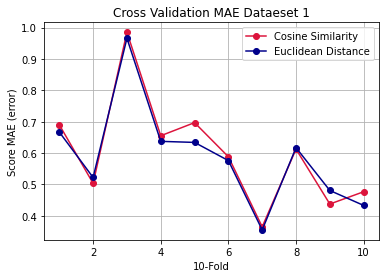

In [77]:
y = score_cos
x = [1,2,3,4,5,6,7,8,9,10]
y1 = score_euc
x1 = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x,y,'-ok', color = 'crimson' )
plt.plot(x1,y1,'-ok', color = 'darkblue')
plt.title("Cross Validation MAE Dataeset 1")
plt.xlabel("10-Fold")
plt.ylabel("Score MAE (error)")
plt.grid(True)
plt.legend(['Cosine Similarity','Euclidean Distance'])


<ipython-input-78-f7498dc49826>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,y,'-ok', color = 'crimson' )
<ipython-input-78-f7498dc49826>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1,y1,'-ok', color = 'darkblue')


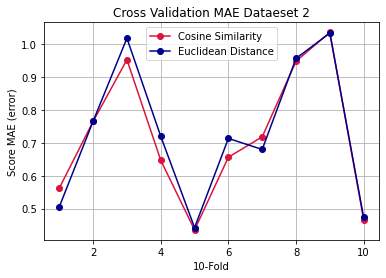

In [78]:
y = score_cos2
x = [1,2,3,4,5,6,7,8,9,10]
y1 = score_euc2
x1 = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x,y,'-ok', color = 'crimson' )
plt.plot(x1,y1,'-ok', color = 'darkblue')
plt.title("Cross Validation MAE Dataeset 2")
plt.xlabel("10-Fold")
plt.ylabel("Score MAE (error)")
plt.grid(True)
plt.legend(['Cosine Similarity','Euclidean Distance'])


<ipython-input-79-c0157fe430b3>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,y,'-ok', color = 'crimson' )
<ipython-input-79-c0157fe430b3>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1,y1,'-ok', color = 'darkblue')


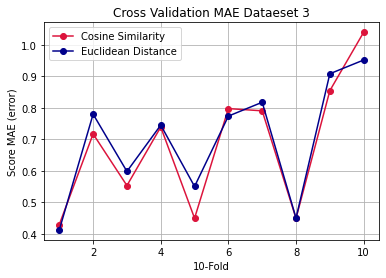

In [79]:
y = score_cos3
x = [1,2,3,4,5,6,7,8,9,10]
y1 = score_euc3
x1 = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x,y,'-ok', color = 'crimson' )
plt.plot(x1,y1,'-ok', color = 'darkblue')
plt.title("Cross Validation MAE Dataeset 3")
plt.xlabel("10-Fold")
plt.ylabel("Score MAE (error)")
plt.grid(True)
plt.legend(['Cosine Similarity','Euclidean Distance'])


<ipython-input-80-44e5b3972b73>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,y,'-ok', color = 'crimson' )
<ipython-input-80-44e5b3972b73>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1,y1,'-ok', color = 'darkblue')


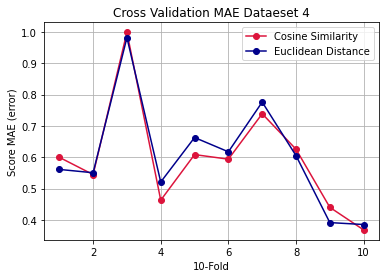

In [80]:
y = score_cos4
x = [1,2,3,4,5,6,7,8,9,10]
y1 = score_euc4
x1 = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x,y,'-ok', color = 'crimson' )
plt.plot(x1,y1,'-ok', color = 'darkblue')
plt.title("Cross Validation MAE Dataeset 4")
plt.xlabel("10-Fold")
plt.ylabel("Score MAE (error)")
plt.grid(True)
plt.legend(['Cosine Similarity','Euclidean Distance'])


<ipython-input-81-56ff98600600>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,y,'-ok', color = 'crimson' )
<ipython-input-81-56ff98600600>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1,y1,'-ok', color = 'darkblue')


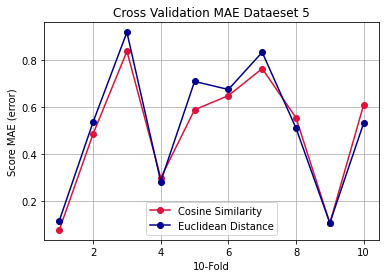

In [81]:
y = score_cos5
x = [1,2,3,4,5,6,7,8,9,10]
y1 = score_euc5
x1 = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x,y,'-ok', color = 'crimson' )
plt.plot(x1,y1,'-ok', color = 'darkblue')
plt.title("Cross Validation MAE Dataeset 5")
plt.xlabel("10-Fold")
plt.ylabel("Score MAE (error)")
plt.grid(True)
plt.legend(['Cosine Similarity','Euclidean Distance'])


In [82]:
dx = [MAE_cos,MAE_cos2,MAE_cos3,MAE_cos4,MAE_cos5]
dy = [MAE_euc,MAE_euc2,MAE_euc3,MAE_euc4,MAE_euc5]

print(dx)
print(dy)

[0.6010623122334047, 0.7189349305732361, 0.6819213511376011, 0.5980046423615871, 0.4968783248333839]
[0.5888126551700382, 0.7309477242235214, 0.6986931756417076, 0.6051640924329376, 0.5219753823234619]


<ipython-input-83-c1116d131309>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1,dx,'-ok', color = 'crimson' )
<ipython-input-83-c1116d131309>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1,dy,'-ok', color = 'darkblue')


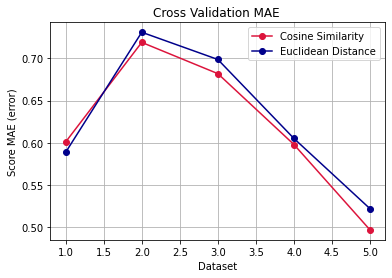

In [83]:
dx = [MAE_cos,MAE_cos2,MAE_cos3,MAE_cos4,MAE_cos5]
dy = [MAE_euc,MAE_euc2,MAE_euc3,MAE_euc4,MAE_euc5]
x1 = [1,2,3,4,5]
plt.plot(x1,dx,'-ok', color = 'crimson' )
plt.plot(x1,dy,'-ok', color = 'darkblue')
plt.title("Cross Validation MAE ")
plt.xlabel("Dataset")
plt.ylabel("Score MAE (error)")
plt.grid(True)
plt.legend(['Cosine Similarity','Euclidean Distance'])



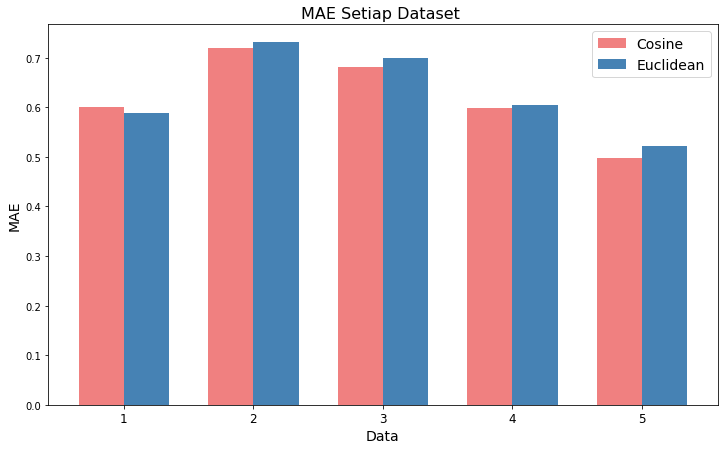

In [84]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


x = np.arange(len(dx))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

mhsa = ax.bar(x - width/2, dx, width, label='Cosine', color='lightcoral')
mhsi = ax.bar(x + width/2, dy, width, label='Euclidean', color='steelblue')

ax.set_title('MAE Setiap Dataset ', size=16)
ax.set_ylabel('MAE', size=14)
ax.set_xlabel('Data', size=14)
ax.set_xticks(x)
ax.set_xticklabels(x1, size=12)
ax.legend(fontsize=14)

plt.show()

In [85]:
mean = pivot_aktual.values
mean.flatten()
mean2 = pivot_aktual2.values
mean2.flatten()
mean3 = pivot_aktual3.values
mean3.flatten()
mean4 = pivot_aktual4.values
mean4.flatten()
mean5 = pivot_aktual5.values
mean5.flatten()


print(mean.mean())
print(mean2.mean())
print(mean3.mean())
print(mean4.mean())
print(mean5.mean())

3.13
3.14
2.92
3.15
3.48


In [86]:
print(testset.mean())
print(testset2.mean())
print(testset3.mean())
print(testset4.mean())
print(testset5.mean())

4.173333333333333
4.361111111111111
4.112676056338028
4.375
4.51948051948052


In [87]:
print(traincos.mean())
print(traincos2.mean())
print(traincos3.mean())
print(traincos4.mean())
print(traincos5.mean())

4.094951247610643
4.245778411982085
3.989314915926395
4.3485787471866555
4.492109420215389


In [88]:
print(traineuc.mean())
print(traineuc2.mean())
print(traineuc3.mean())
print(traineuc4.mean())
print(traineuc5.mean())

3.9828382818084327
4.150670505871743
3.870168321520575
4.277209803024331
4.387123507127195


In [89]:
sparsity = (pivot_aktual.to_numpy() ==0 ).mean()
sparsity2 = (pivot_aktual2.to_numpy() ==0 ).mean()
sparsity3 = (pivot_aktual3.to_numpy() ==0 ).mean()
sparsity4 = (pivot_aktual4.to_numpy() ==0 ).mean()
sparsity5 = (pivot_aktual5.to_numpy() ==0 ).mean()

print(sparsity)
print(sparsity2)
print(sparsity3)
print(sparsity4)
print(sparsity5)

0.25
0.28
0.29
0.28
0.23


MAE berdasarkan Presentase (banyaknya data) data yang ditest 

In [90]:
data_concat = pd.concat([dframe, dframe2, dframe3, dframe4, dframe5])
data_concat

,user_id,title,pred_cosine,pred_euclidean,aktual
0,3922,Harry Potter and the Sorcerer's Stone (Harry P...,3.899750,4.095726,5.0
1,5115,Harry Potter and the Sorcerer's Stone (Harry P...,3.806777,3.797773,4.0
2,5461,Harry Potter and the Sorcerer's Stone (Harry P...,4.315020,4.300229,4.0
3,6342,Harry Potter and the Sorcerer's Stone (Harry P...,4.705104,4.601846,3.0
4,7001,Harry Potter and the Sorcerer's Stone (Harry P...,3.803043,3.801475,NaN
...,...,...,...,...,...
95,49298,Memoirs of a Geisha,5.000000,5.000000,5.0
96,50101,Memoirs of a Geisha,5.000000,5.000000,5.0
97,50104,Memoirs of a Geisha,5.000000,5.000000,5.0
98,50133,Memoirs of a Geisha,4.009903,3.898909,5.0


In [91]:
pivot_concat = pd.pivot_table(data_concat, index='title', columns='user_id', values='aktual', aggfunc = np.sum )
pivot_concat

user_id,3922,5115,5461,6342,7001,10111,10140,10944,11691,11692,...,44397,45269,47800,48559,48687,49298,50101,50104,50133,53292
title,,,,,,,,,,,,,,,,,,,,,
1984,5.0,4.0,0.0,5.0,3.0,0.0,0.0,4.0,5.0,5.0,...,5.0,5.0,4.0,5.0,2.0,5.0,5.0,5.0,0.0,0.0
Animal Farm,0.0,3.0,4.0,5.0,3.0,4.0,0.0,4.0,0.0,5.0,...,4.0,5.0,3.0,5.0,3.0,5.0,0.0,5.0,0.0,3.0
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",5.0,4.0,4.0,3.0,0.0,5.0,3.0,5.0,4.0,3.0,...,4.0,5.0,5.0,1.0,5.0,0.0,5.0,5.0,5.0,4.0
Memoirs of a Geisha,4.0,3.0,4.0,4.0,4.0,5.0,3.0,0.0,0.0,4.0,...,0.0,5.0,3.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
Pride and Prejudice,5.0,4.0,3.0,0.0,4.0,5.0,0.0,4.0,0.0,5.0,...,0.0,5.0,4.0,5.0,0.0,5.0,0.0,5.0,3.0,0.0
The Diary of a Young Girl,3.0,0.0,5.0,0.0,4.0,0.0,3.0,0.0,4.0,5.0,...,0.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,0.0,5.0
"The Girl with the Dragon Tattoo (Millennium, #1)",5.0,4.0,4.0,4.0,0.0,4.0,0.0,4.0,4.0,4.0,...,4.0,4.0,0.0,5.0,0.0,5.0,5.0,5.0,4.0,4.0
The Great Gatsby,2.0,3.0,5.0,5.0,5.0,5.0,0.0,3.0,5.0,4.0,...,4.0,3.0,3.0,5.0,2.0,0.0,5.0,0.0,4.0,0.0
The Kite Runner,0.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,0.0,4.0,...,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0


In [92]:
dc = data_concat.dropna(how='any',axis=0)
testset_all = dc['aktual']
traincos_all = dc['pred_cosine']
traineuc_all = dc['pred_euclidean']

In [93]:
n = 3
sum= 0
sumeuc = 0
euc_cos_dist = 0

for i in range (n):
    sum += abs(traincos[i]-testset[i])
    error = sum/n
    sumeuc += abs(traineuc[i]-testset[i])
    erroreuc = sumeuc/n
    euc_cos_dist += abs(traincos[i]-traineuc[i])
    errordist = euc_cos_dist/n
    
print("Mean absolute error Cosine: " + str(error))
print("Mean absolute error Cosine: " + str(erroreuc))
print("Mean absolute error Cosine: " + str(errordist))

Mean absolute error Cosine: 0.5361643239550661
Mean absolute error Cosine: 0.46890998057828676
Mean absolute error Cosine: 0.07325673685976615


In [94]:
#MAE bedasarkan 10% Dari Data
all = len(dc)
n10 = round((10/100)*all)
sumcos = 0
sumeuc = 0
euc_cos_dist = 0
for i,j,k in zip(testset_all[:n10], traincos_all[:n10], traineuc_all[:n10]):
        sumcos += abs(i-j)
        error_10 = sumcos/n10
        sumeuc += abs(i-k)
        error_10_2 = sumeuc/n10
        euc_cos_dist += abs(j-k)
        error_10_3 = euc_cos_dist/n10

print("#MAE bedasarkan 10% Dari Data Cosine: " + str(error_10))
print("#MAE bedasarkan 10% Dari Data Eucldiean: " + str(error_10_2))
print("#MAE bedasarkan 10% Dari Data dist: " + str(error_10_3))

#MAE bedasarkan 10% Dari Data Cosine: 0.7186827332606284
#MAE bedasarkan 10% Dari Data Eucldiean: 0.7463248219174919
#MAE bedasarkan 10% Dari Data dist: 0.12998925961007032


In [95]:
#MAE bedasarkan 30% Dari Data
n30 = round((30/100)*all)
sumcos = 0
sumeuc = 0
euc_cos_dist = 0
for i,j,k in zip(testset_all[:n30], traincos_all[:n30], traineuc_all[:n30]):
        sumcos += abs(i-j)
        error_30 = sumcos/n30
        sumeuc += abs(i-k)
        error_30_2 = sumeuc/n30
        euc_cos_dist += abs(j-k)
        error_30_3 = euc_cos_dist/n30

print("#MAE bedasarkan 30% Dari Data Cosine: " + str(error_30))
print("#MAE bedasarkan 30% Dari Data Eucldiean: " + str(error_30_2))
print("#MAE bedasarkan 30% Dari Data dist: " + str(error_30_3))

#MAE bedasarkan 30% Dari Data Cosine: 0.640188079861688
#MAE bedasarkan 30% Dari Data Eucldiean: 0.6699635213257465
#MAE bedasarkan 30% Dari Data dist: 0.12848132829279085


In [96]:
#MAE bedasarkan 50% Dari Data
n50 = round((50/100)*all)
sumcos = 0
sumeuc = 0
euc_cos_dist = 0
for i,j,k in zip(testset_all[:n50], traincos_all[:n50], traineuc_all[:n50]):
        sumcos += abs(i-j)
        error_50 = sumcos/n50
        sumeuc += abs(i-k)
        error_50_2 = sumeuc/n50
        euc_cos_dist += abs(j-k)
        error_50_3 = euc_cos_dist/n50

print("#MAE bedasarkan 50% Dari Data Cosine: " + str(error_50))
print("#MAE bedasarkan 50% Dari Data Eucldiean: " + str(error_50_2))
print("#MAE bedasarkan 50% Dari Data dist: " + str(error_50_3))

#MAE bedasarkan 50% Dari Data Cosine: 0.6597974766151357
#MAE bedasarkan 50% Dari Data Eucldiean: 0.691069265301458
#MAE bedasarkan 50% Dari Data dist: 0.13466562078349137


In [97]:
#MAE bedasarkan 70% Dari Data
n70 = round((70/100)*all)
sumcos = 0
sumeuc = 0
euc_cos_dist = 0
for i,j,k in zip(testset_all[:n70], traincos_all[:n70], traineuc_all[:n70]):
        sumcos += abs(i-j)
        error_70_ = sumcos/n70
        sumeuc += abs(i-k)
        error_70_2 = sumeuc/n70
        euc_cos_dist += abs(j-k)
        error_70_3 = euc_cos_dist/n70

print("#MAE bedasarkan 70% Dari Data Cosine: " + str(error_70_))
print("#MAE bedasarkan 70% Dari Data Eucldiean: " + str(error_70_2))
print("#MAE bedasarkan 70% Dari Data dist: " + str(error_70_3))


#MAE bedasarkan 70% Dari Data Cosine: 0.6426391993096565
#MAE bedasarkan 70% Dari Data Eucldiean: 0.6674340683201008
#MAE bedasarkan 70% Dari Data dist: 0.13052659044442433


In [98]:
#MAE bedasarkan 90% Dari Data
n90 = round((90/100)*all)
sumcos = 0
sumeuc = 0
euc_cos_dist = 0
for i,j,k in zip(testset_all[:n90], traincos_all[:n90], traineuc_all[:n90]):
        sumcos += abs(i-j)
        error_90_ = sumcos/n90
        sumeuc += abs(i-k)
        error_90_2 = sumeuc/n90
        euc_cos_dist += abs(j-k)
        error_90_3 = euc_cos_dist/n90

print("#MAE bedasarkan 90% Dari Data Cosine: " + str(error_90_))
print("#MAE bedasarkan 90% Dari Data Eucldiean: " + str(error_90_2))
print("#MAE bedasarkan 90% Dari Data dist: " + str(error_90_3))

#MAE bedasarkan 90% Dari Data Cosine: 0.6235007875864629
#MAE bedasarkan 90% Dari Data Eucldiean: 0.6550368685620496
#MAE bedasarkan 90% Dari Data dist: 0.12580922807168532


In [99]:
#MAE bedasarkan Semua Data
sumcos = 0
sumeuc = 0
euc_cos_dist = 0
for i,j,k in zip(testset_all[:all], traincos_all[:all], traineuc_all[:all]):
        sumcos += abs(i-j)
        error_ = sumcos/all
        sumeuc += abs(i-k)
        error2 = sumeuc/all
        euc_cos_dist += abs(j-k)
        error3 = euc_cos_dist/all
print("#MAE bedasarkan Semua Data Cosine: " + str(error_))
print("#MAE bedasarkan Semua Data Eucldiean: " + str(error2))
print("#MAE bedasarkan Semua Data dist: " + str(error3))

#MAE bedasarkan Semua Data Cosine: 0.5993032955407848
#MAE bedasarkan Semua Data Eucldiean: 0.6314038144233107
#MAE bedasarkan Semua Data dist: 0.12318987827020765


<ipython-input-100-08944332fc3a>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2,yy,'-ok', color = 'crimson')
<ipython-input-100-08944332fc3a>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2,y2,'-ok', color = 'darkblue')


<function matplotlib.pyplot.show(close=None, block=None)>

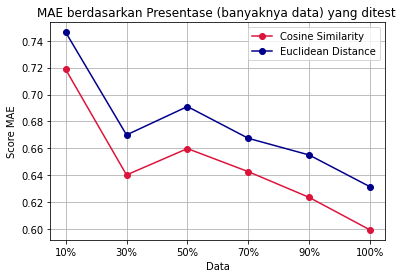

In [100]:
yy = [error_10, error_30,error_50, error_70_, error_90_,error_ ]
y2 = [error_10_2,error_30_2,error_50_2, error_70_2, error_90_2, error2]
x2 = ['10%','30%','50%','70%','90%','100%']
plt.plot(x2,yy,'-ok', color = 'crimson')
plt.plot(x2,y2,'-ok', color = 'darkblue')
plt.title("MAE berdasarkan Presentase (banyaknya data) yang ditest ")
plt.xlabel("Data")
plt.ylabel("Score MAE")
plt.legend(['Cosine Similarity','Euclidean Distance'])
plt.grid(True)
plt.show


In [101]:
ds = data_concat.fillna(0)
datatest_all = ds['aktual']
datatraincos_all = ds['pred_cosine']
datatraineuc_all = ds['pred_euclidean']

In [102]:
print((datatest_all[0:10]==0).mean())
print((datatest_all[0:30]==0).mean())
print((datatest_all[0:50]==0).mean())
print((datatest_all[0:70]==0).mean())
print((datatest_all[0:90]==0).mean())
print((datatest_all==0).mean())

0.1
0.2
0.22
0.24285714285714285
0.25555555555555554
0.266


In [103]:
import statistics

datamc = [error_10, error_30,error_50, error_70_, error_90_,error_ ]
datame = [error_10_2,error_30_2,error_50_2, error_70_2, error_90_2, error2]
print("Mean MAE Cossine     :",statistics.mean(datamc))
print("Mean MAE Euclidean   :",statistics.mean(datame))


Mean MAE Cossine     : 0.647351928695726
Mean MAE Euclidean   : 0.6768720599750262


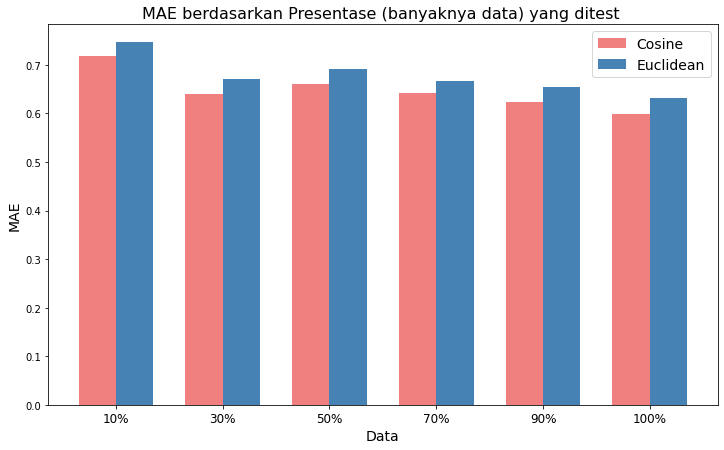

In [104]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


x = np.arange(len(x2))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

mhsa = ax.bar(x - width/2, yy, width, label='Cosine', color='lightcoral')
mhsi = ax.bar(x + width/2, y2, width, label='Euclidean', color='steelblue')

ax.set_title('MAE berdasarkan Presentase (banyaknya data) yang ditest ', size=16)
ax.set_ylabel('MAE', size=14)
ax.set_xlabel('Data', size=14)
ax.set_xticks(x)
ax.set_xticklabels(x2, size=12)
ax.legend(fontsize=14)

plt.show()